# Project: Linear Regression on King's County Home Sales Data Set

My goal of this project is to determine which features of the data set most accurately and reliably (statistically speaking) predict the sale price of a home.

Sub-goals or questions I will attempt to answer at the tail-end of this work include:
1. Which features can be feasibly addressed by a seller to increase the sale price of his/her home?
2. Provide a concrete strategy using the an optimized linear regression model to accomplish this.

## Approach

My high-level approach is to build the most robust, most predictive model - that is, with the highest *Coefficient of Determination*, $R^2$, that *reliably* predicts our target, **price**, with minimized residuals - on the most optimal set of statistically significant features as possible.

### High $R^2$ is not enough!
We are not only interested simply in the the model's *Coefficient of Determination*, $R^2$, but we also want a feel  of the confidence of that measure.

**A "respectable" $R^2$ (say, $R^2 \ge 0.6$) could be artificially inflated with a high degree of *multicolinearity*, for example**.

### Overfitting must be minimized
As part of our procedure when building linear regression models, we minimize over-fitting with the use of cross-validation and combinatorics.

### Data Bias must be minimized as much as possible
I employ the standard *hold-out* set technique to separate data when building models into the usual $0.70$/$0.30$ split of *training* data and *testing* data sets.  Models are built using training data.  Residuals are minimized by targeting models with the minimal Mean Squared Error (MSE) and minimal $\Delta MSE$ between the *predicted* target (**price**) values from the *training* data set vs. the actual target values from the hold-out *testing* data set.

### Model validation, Multicolinearity, and Feature Selection
Confidence in the computed *Coefficient of Determination*, $R^2$, itself must be "measured" since not all $R^2$'s that are equal are created "equally" *given the possibility for colinearity* as well as "over-fitness"!  These facets, if not addressed, will render a linear regression model stastically unreliable.

In order to produce a model in which we can be confident in $R^2$, I validate it deterministically.

As will be shown, multicolinearity is a problem.  When multicolinearity is present in a model, we cannot be confident in the statistical significance (*p-value*) of a colinear predictor.  So, colinear predictors must be identified and dealt with in order to provide confidence in the measure of $R^2$ and stastical signficance, in general.

There are two means of handling colinearity of predictors:
1. Introduce an *interaction term*, which will effectively combine two colinear predictors in the model, or
2. Drop a term from a given set of colinear predictors.

Either approach taken must be backed by mathematical rationale.  That is, some mathematically deterministic method must be employed to first *select* (identify) which features are colinear.

#### Variance Inflation Factor
According to James, Witten, Hastie & Tibshirani,

    a ... way to assess multi-collinearity is to compute the variance inﬂation factor (VIF). The VIF is the ratio of the variance of [the coefficient of a predictor] when ﬁtting the full model divided by the variance of [the coefficient of a predictor] if fit on its own. The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.  (James, Witten, Hastie & Tibshirani, 2012)

#### Forward Selection of Features
Rather than making "educated guesses" in the feature selection process, after cleaning the data set, I use *cross-validation*, *k-folds*, and *combinatorics* to select the "best" model (from the best feature-set combination) built on training data when compared to testing data, based a simple, ***greedy* forward selection** using dynamic programming. 

The details and pseudocode for the algorithm are listed in the [Cross-Validation Forward Selection of Features](Appendix.ipynb) in the appendix.  

So, some effort is made up front to "intelligently" reduce the set of starting features by building a preliminary model and then removing features which obviously do not inluence **price** or are highly correlated, based on Regression Diagnostics as well as the *Variance Inflation Factor* (VIF) of a given feature.


### Conditions for success - i.e. whether a linear regression model is "good" or "bad"
Given the following conditions, we have a "GOOD" model:
1. $R^2 > .60$
2. $|MSE(test) - MSE(train)| \approx 0$
3. low Condition Number (measure of colinearity)... much less than 1000; we target a Condtion Number threshold of 100 or less.

The first condition says that we want models that determine the target with greater than 60% "confidence".

The second condition says that the bias toward the training data is minimal when compared to how the model performs on the "hold-out" test data.

The third condition says requires that colinearity be mitigated/minimized.

### Toward Regression: Most important aspect is understanding the data!
To that end, I proceed according to the following steps:
1. Import all necessary libraries and the the data set
2. Cleaning the data set:
    1. Clean null values, if any
    2. Clean outlier values, if any
    3. Convert feature data types as necessary
3. EDA: Gain familiarity with the data set by building a preliminary linear regression model
    1. Utilize Regression Diagnostics
    2. Explore distriubutions
    3. Explore colinearity
3. EDA: Scale, Normalize, Transform features in the data set as necessary for the working model.
4. Execute the `cv_selection_dp` routine to select the "optimal" feature set to produce the final optimized model.
4. Run linear regression experiments to answer real questions
    1. As a whole, do structural features or location influence home sale price more?
    2. If structural, which subset of features are the most influential?

## Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import numpy as np
import scjpnlib.utils as scjpnutils
import scjpnlib.regression.api as scjpnregression
import datetime

%matplotlib inline

plt.style.use('ggplot')

scjpnregression.plot_edge = 4

<br><br>
## Step 2: Exploratory Data Analysis and Data Set Cleaning

In order to focus on building linear regression models in this notebook, Step 2 is done in a separately.

In [2]:
from pathlib import Path
fname_kc_house_cleaned_data = 'kc_house_cleaned_data.csv'
while not Path(fname_kc_house_cleaned_data).is_file():
    scjpnutils.yes_no_prompt("<a href='Step2.ipynb' target='_blank'>Step 2</a>, which cleans the data set, has not yet been run.  Please <a href='Step2.ipynb' target='_blank'>Open</a> and run it now, then Press ENTER after it completes.")
display(HTML("Open <a href='Step2.ipynb' target='_blank'>this</a> notebook to view how data is cleaned in <a href='Step2.ipynb' target='_blank'>Step 2</a> (or to re-run it), though it is not necessary if you want to jump straight into linear regression."))    
display(HTML("Note that <b>if you do re-run the <a href='Step2.ipynb' target='_blank'>Step 2</a> notebook, you will have to re-run THIS notebook in order to use those results</b>."))

<br><br>
Obviously the most important outcome of that exercise is a cleaned data set.

But another result is the initial identification of which features are *continuous* (quantitative) vs. which features are *categorical*.

Note that this distinction is crucial since it will dictate if and how data is transformed.

Recall:

### Characteristics of Categorical and Quantitative data (Nedha, 2013):
- **Continuous** (quantitative) data belong to ordinal, interval, or ratio classes of measurements.
- **Categorical** data belong to the nominal class of measurements


<br><br>
## Categorical vs. Continuous Feature Indentification

Taken directly from the list of feature-definitions, we have:
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  prediction target
* **bedrooms** - # of Bedrooms/House
* **bathrooms** - # of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - # of floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

<br><br>
*Based on the above definitions*, it initially looks like the following features are *categorical* (qualitative):
* **view**
* **waterfront**
* **zipcode**

The rest of the features appear to be *continuous*, *holding quantitive (measured) values*:
* **bedrooms**
* **bathrooms**
* **sqft_living**
* **sqft_lot**
* **floors**
* **condition**
* **grade**
* **sqft_above**
* **sqft_basement**
* **yr_built**
* **yr_renovated**
* **lat**
* **long**
* **sqft_living15**
* **sqft_lot15**

<br><br>
### Import the cleaned data set

In [3]:
# import the data set
kchd_cleaned_df = pd.read_csv('kc_house_cleaned_data.csv')

target = 'price'

<br><br>
We note that neither **id** nor **date** are useful in this project since it is obvious that neither one should factor into determing our target variablem **price**:
1. **id** will not contribute whatsoever to linear regression
2. if **date** DOES contribute it will likely be due to other factors outside of this data set - e.g. the stock market, the local economy, unemployment rates, etc; so we just drop it from the start to remove any external influence from our model

We will drop those two columns inline whenever we build a linear regression model.

<br><br>
From the Step 2 notebook, we noted that, based on feature definitions provided for this project, we have the following *initial* list of *categorica*l features.

In [4]:
categorical_features = ['waterfront', 'view', 'zipcode']
continuous_features = scjpnutils.get_remaining_features(kchd_cleaned_df, target, categorical_features)
kchd_cat_classification_df = scjpnutils.classify_as_categorical(kchd_cleaned_df, p_cat_th=0.0, exclude_null_vals=False)

<br><br>
## Step 3: Getting to Know the Features and Data: Preliminary Linear Regression Model

We now want to get a feel for how the feature set performs in a linear regression model *without scaling, normalization, or log-transformation of the data*.

Here are our hypotheses:
<br><br>
$H_0$: There is no linear relationship between target, **price** vs. the initial set of (all) predictors.
<br>
$H_a$: Some linear relationship exists between target, **price** vs. the initial set of (all) predictors.

<br><br>
The `lin_reg_model` function was written to encapsulate the code to do this.  It wraps up a few tasks on our behalf, the most important of which is actually building the model using statsmodels Ordinary Least Squares (OLS) method.  But first, it uses the `cv_score` function to split the data set into test and training paritions at a ratio of 70/30%, which is industry standard.  The model is built, of course, on the training partition and then validated against the data in the test partition.

With the regression results, it then wraps the output of:
1. a VIF summary of all features, for multicolinearity guidance,
2. the colinearity matrix,
3. the qq residuals plot,
4. the disribution of the target (**price**),
5. the influnce plot as a visual display of potential outliers (in the response),
6. and of course the regression results summary in tabular format.

<br><br>
So, it is used now to test the above hypotheses to provide some direction for improvement.

yes



formula: price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15


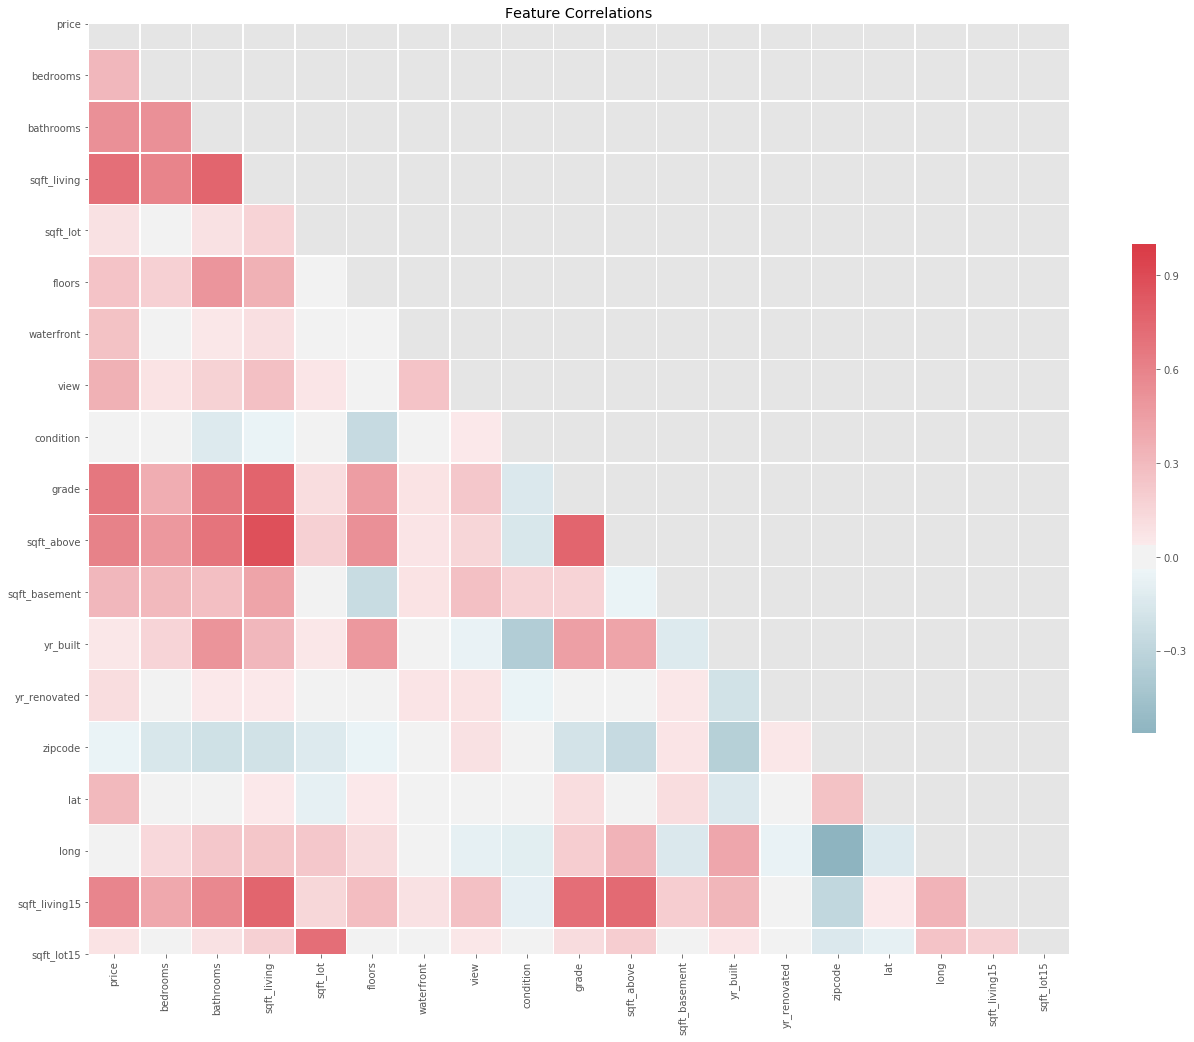

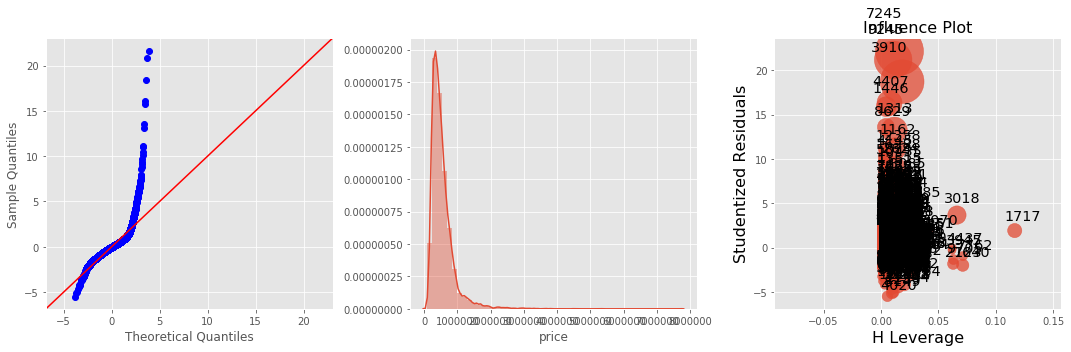

In [5]:
display_lin_reg_infl_plot=scjpnutils.yes_no_prompt("Display Linear Regression Influence Plot (it takes a long time)? (y/n)")

target = 'price'
mv_r_sq_th = .50  # i.e. we want more than 50% Coefficient of Determination
mv_delta_score_th = 1 # default scoring method is delta RMSE
mv_bad_vif_ratio_th = 0.50

(
    sel_features
    , X_train
    , X_test
    , y_train
    , y_test
    , train_score
    , test_score
    , model
) = scjpnregression.lin_reg_model(
    kchd_cleaned_df.drop(['id', 'date'], axis=1)
    , target
    , title="Preliminary Linear Regression Model:"
)

(model_fit_results, good_vif_features, bad_vif_features) = scjpnregression.model_fit_summary(
    kchd_cleaned_df
    , sel_features
    , target
    , model
    , train_score
    , test_score
    , mv_r_sq_th
    , mv_delta_score_th
    , mv_bad_vif_ratio_th
    , display_infl_plot=display_lin_reg_infl_plot
)

first_model = model
first_train_score = train_score
first_test_score = test_score
first_mfr = model_fit_results

display_lin_reg_infl_plot = False

<br><br>
### Preliminary Linear Regression Model: Analysis

In [6]:
display(HTML("$R^2 = {}$ is pretty good! But model validation fails Model Validation.".format(round(model_fit_results.rsquared, 3))))
display(HTML("Take a look at the difference in RMSEs of the residuals between the train/test data (using the standard 70/30% split ratio)."))
display(HTML("<b>$\\Delta RMSE$ is a woeful ${}$</b>!".format(int(abs(train_score-test_score)))))

Note, in particular, that OLS reports that **"there are
strong multicollinearity or other numerical problems"** in the data set.

Our VIF summary states in more detail that most of our features are colinear.

$\Delta RMSE$ is not good.  The meaning is that **this model does not reliably/accurately predict our target, *price*, in our test data set**.

The QQ-plot of residuals is UGLY!  It indicates an abundance of outliers by virtue of SEVERE tail deviation.

According to the [kurtosis](https://www.investopedia.com/terms/k/kurtosis.asp) article, kurtosis of this sort is [**leptokurtic**](https://www.investopedia.com/terms/l/leptokurtic.asp) and is highly undesirable since **there are occasional extreme outliers that cause 'concentrations' of observations** and detracts from stable predictability.  A leptokurtic distribution means that the **we can experience broader fluctuations in our target (e.g. three or more standard deviations from the mean) resulting in greater potential for extremely low or high price**. ("Kurtosis" and "Understanding Leptokurtic Distributions", 2019).

Additionally, the influence plot seems to indicate the presence of heavily influential outliers on the top end with this model.

<br><br>
#### CONCLUSION:

**This is not a well-performing model**.  Not at all.

We MUST do some work to improve the performance of our preliminary linear regression model if we hope to predict sale price with confidence. 

Most importantly, **we cannot reject $H_0$**.  Thus, **taking the cleaned data set as is, there is no linear relationship between target, *price* vs. the initial set of (all) predictors**.

#### What can we do to improve its performance?

The first thing we notice in the QQ-plot and the distribution plot of our target, **price**, is that it is heavily skewed - i.e. NOT normally distributed.

Before we consider possibly dropping any features due to misbehavior, we shall scale and possibly transform our data set as a first measure.

But before we get into that, let's **give out target, *price*, a normal distribution by *log-transforming* it**.  And of course we will re-run regression to investigate the impact.  We noted already that the QQ-plot of residuals indicates the presence of outliers.  Scaling our target may mitigate this.

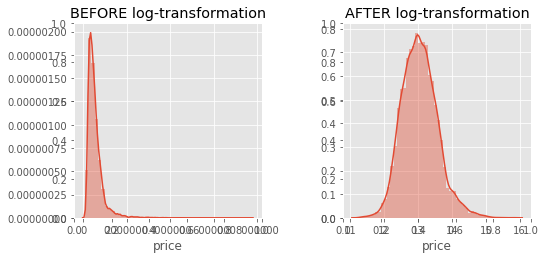

In [7]:
kchd_cleaned_with_log_transformed_target_df = kchd_cleaned_df.copy()
kchd_cleaned_with_log_transformed_target_df[target] = kchd_cleaned_with_log_transformed_target_df[target].map(lambda v: np.log(v))

scjpnregression.histograms_comparison(
    kchd_cleaned_df[[target]]
    , kchd_cleaned_with_log_transformed_target_df[[target]]
    , "BEFORE log-transformation"
    , "AFTER log-transformation"
)

<br><br>
### Preliminary Linear Regression Model: after *log-transforming* our target, *price*

<b>Building a new linear regression model <i>based on log-transformed target, price</i>, in theory, should perform better than the last one</b>.

Here are the new hypotheses:
<br><br>
$H_0$: There is no linear relationship between *log-transformed* target, **price** vs. the initial set of (all) predictors.
<br>
$H_a$: Some linear relationship exists between *log-transformed* target, **price** vs. the initial set of (all) predictors.

yes



formula: price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15


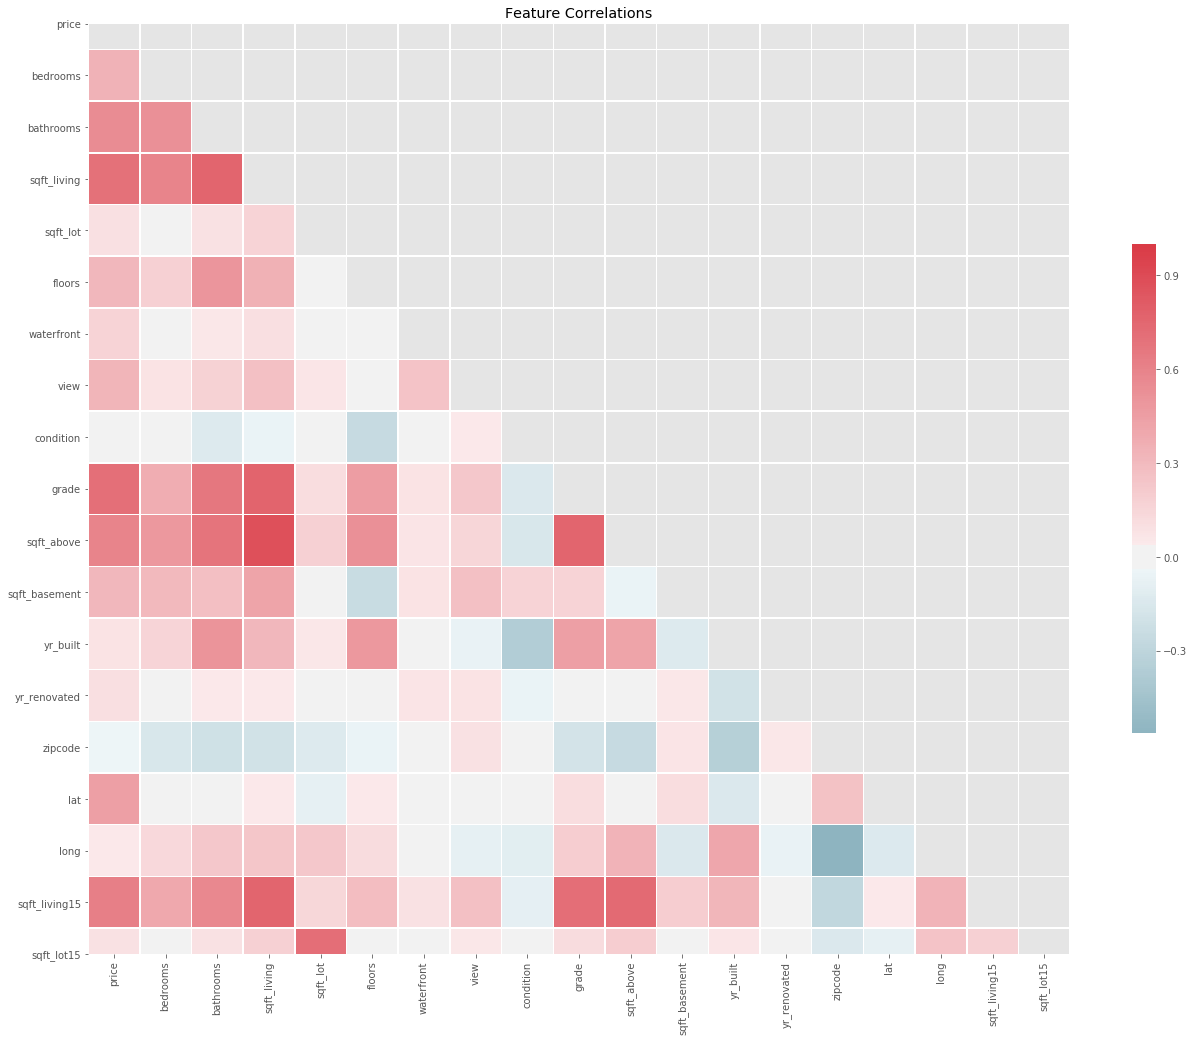

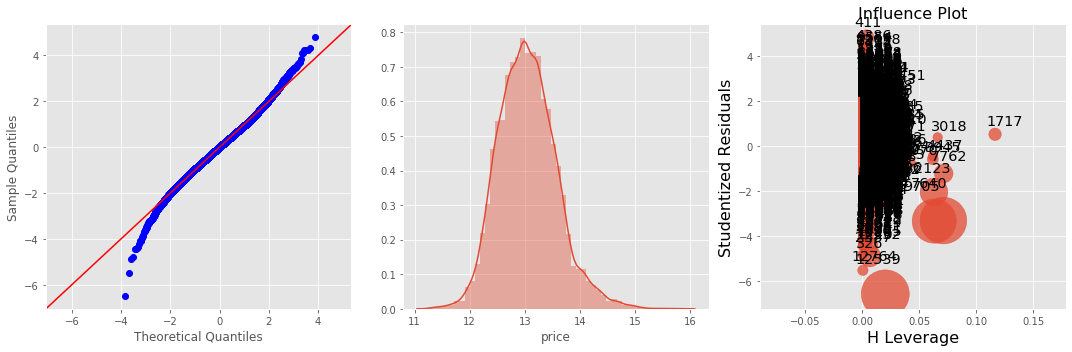

In [8]:
display_lin_reg_infl_plot=scjpnutils.yes_no_prompt("Display Linear Regression Influence Plot (it takes a long time)? (y/n)")

prev_sel_features = sel_features
prev_train_score = train_score
prev_test_score = test_score
prev_model = model
(
    preliminary_model_features
    , X_train
    , X_test
    , y_train
    , y_test
    , train_score
    , test_score
    , model
) = scjpnregression.lin_reg_model(
    kchd_cleaned_with_log_transformed_target_df.drop(['id', 'date'], axis=1)
    , target
    , title="Preliminary Linear Regression Model, after <i>log-transforming</i> target, <i>price</i>"
)

prev_good_vif_features = good_vif_features
prev_bad_vif_features = bad_vif_features
prev_model_fit_results = model_fit_results
(model_fit_results, good_vif_features, bad_vif_features) = scjpnregression.model_fit_summary(
    kchd_cleaned_with_log_transformed_target_df.drop(['id', 'date'], axis=1)
    , preliminary_model_features
    , target
    , model
    , train_score
    , test_score
    , mv_r_sq_th
    , mv_delta_score_th
    , mv_bad_vif_ratio_th
    , display_infl_plot=display_lin_reg_infl_plot
)

display_lin_reg_infl_plot = False

<br><br>
### Preliminary Linear Regression Model, after log-transforming target, *price*: ANALYSIS

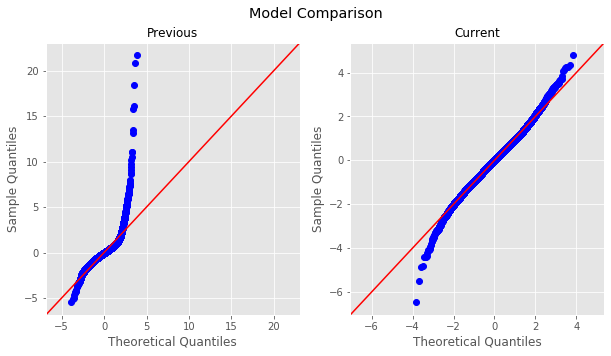

In [9]:
scjpnregression.mfrs_comparison(
    models=[prev_model, model]
    , mfrs=[prev_model_fit_results, model_fit_results]
    , scores_dict={
        'method': scjpnregression.rmse_train_and_rmse_test
        , 'scores': [(prev_train_score, prev_test_score), (train_score, test_score)]
    }
)

display(HTML("$R^2 = {}$ has improved quite a bit!".format(round(model_fit_results.rsquared, 3))))
display(HTML("<b>Perhaps more impressive is the drop in $\Delta RMSE$ to approximately ${}$</b>!".format(int(abs(train_score-test_score)))))
display(HTML("The <i>Condition Number</i> is super high, indicating multicolinearity is still an issue with {}% of our features being colinear (according to VIF analysis).".format(round((len(bad_vif_features)/len(sel_features))*100,2))))

Looking at the QQ-plot of residuals, the problem with outliers has improved (but not much) by *log-transforming* our target, **price**.

The kurtosis manifested in this model appears to be a blend of [**leptokurtic**](https://www.investopedia.com/terms/l/leptokurtic.asp) and [**platykurtic**](https://www.investopedia.com/terms/p/platykurtic.asp) kurtosis.  

According to the [kurtosis](https://www.investopedia.com/terms/k/kurtosis.asp) article, **models manifesting [mesokurtic](https://www.investopedia.com/terms/m/mesokurtic.asp) distributions in the target are the most desirable since they will most stably offer accurate predictions**.  

A model exhibiting a platykurtic distribution in the target is reliable (but not as much as one with  mesokurtic kurtosis) since, according to the article, **platykurtic target distributions are stable and predictable, in the sense that there will rarely (if ever) be extreme (outlier) observations of the target**.

As mentioned previously, leptokurtic distributions in the target are highly undesirable since there are occasional extreme outliers that cause 'concentrations' of observations and detract from stable predictability because we can experience broader fluctuations in our target (e.g. three or more standard deviations from the mean) resulting in greater potential for extremely low or high. ("Kurtosis" and "Understanding Leptokurtic Distributions", 2019).

We want a model with a kurtosis that is clearly platykurtic (acceptable) or mesokurtic (best case).

Again, the influence plot seems to indicate the presence of heavily influential outliers, but this time on the bottom end, with this model.

The most important takeaway here is the plot of residuals.  Our predictive "power" with this model has improved a lot.

<br><br>
#### CONCLUSION:
Model Validation appears to have passed.  We have VASTLY improved our model, just by *log-transforming* our target feature, **price**.

This time **we can reject $H_0$**.  Thus, **some linear relationship exists between *log-transformed* target, *price* vs. the initial set of (all) predictors using the cleaned data set**.

Nevertheless, since this model still exhibits kurtosis that somewhat leptokurtic, we reject it.

#### What can we do to improve its performance?
Again, before we consider dropping features as a means to deal with multicolinearity, let's check for abnormal distributions of our features and log-transform them as necessary.  We will also min-max scale our target as well as all of our *continuous* features.

Let's have a look at the regression diagnostic and distribution plots of our predictors from the last model and use them as a basis to further out understanding of our features.

<br><br>
### Feature understanding and Fine Tuning

Here, we leverage Regression Diagnostics of the **Preliminary Linear Regression Model, after log-transforming target, *price*** to better understand how we can tune and/or transform our data for a better performing model.

We'll examine features one by one within the context of Regression Diagnostics from the last model we built.

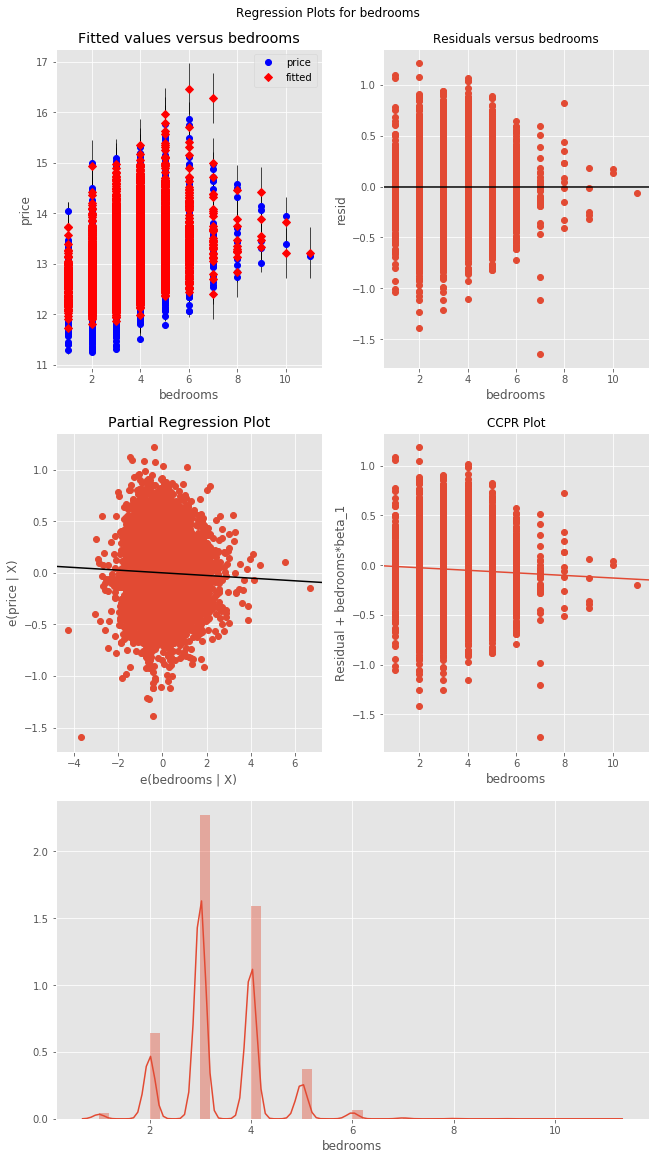

In [10]:
continuous_features = []
lt_cont_feats = []
categorical_features = []

kchd_cleaned_and_transformed_df = kchd_cleaned_with_log_transformed_target_df.copy()

curr_feat_idx = 0

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic

In [11]:
continuous_features.append('bedrooms')
lt_cont_feats.append('bedrooms')

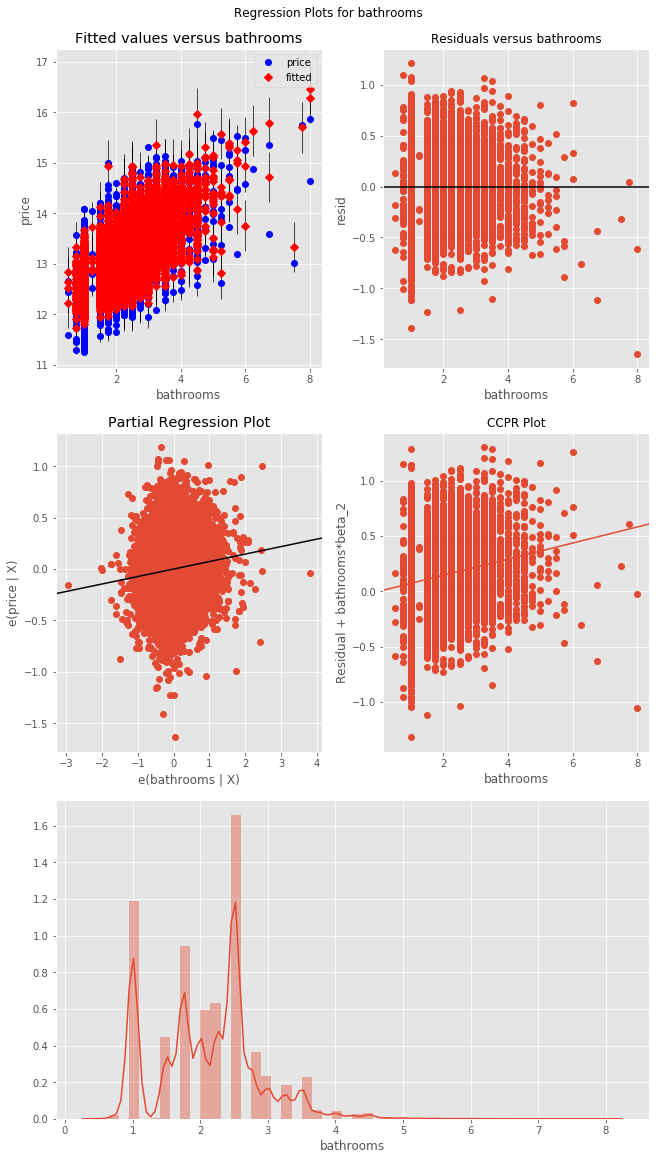

In [12]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic

In [13]:
continuous_features.append('bathrooms')
lt_cont_feats.append('bathrooms')

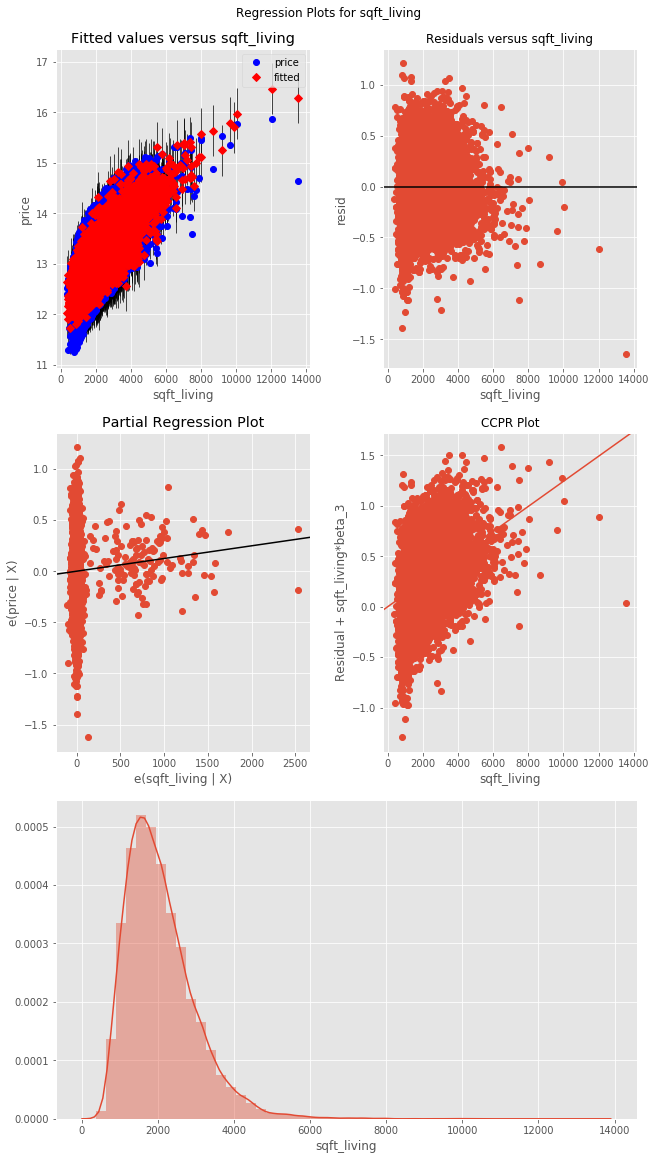

In [14]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic

In [15]:
continuous_features.append('sqft_living')
lt_cont_feats.append('sqft_living')

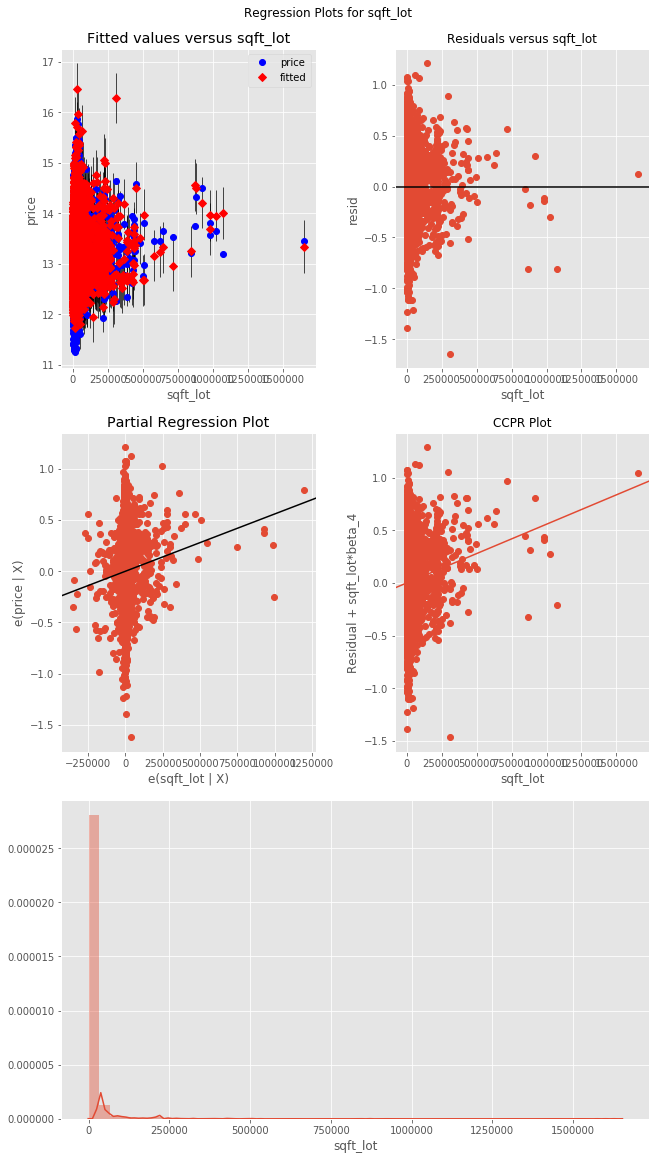

In [16]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low and VIF is low, therefore this p-value can be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic

In [17]:
continuous_features.append('sqft_lot')
lt_cont_feats.append('sqft_lot')

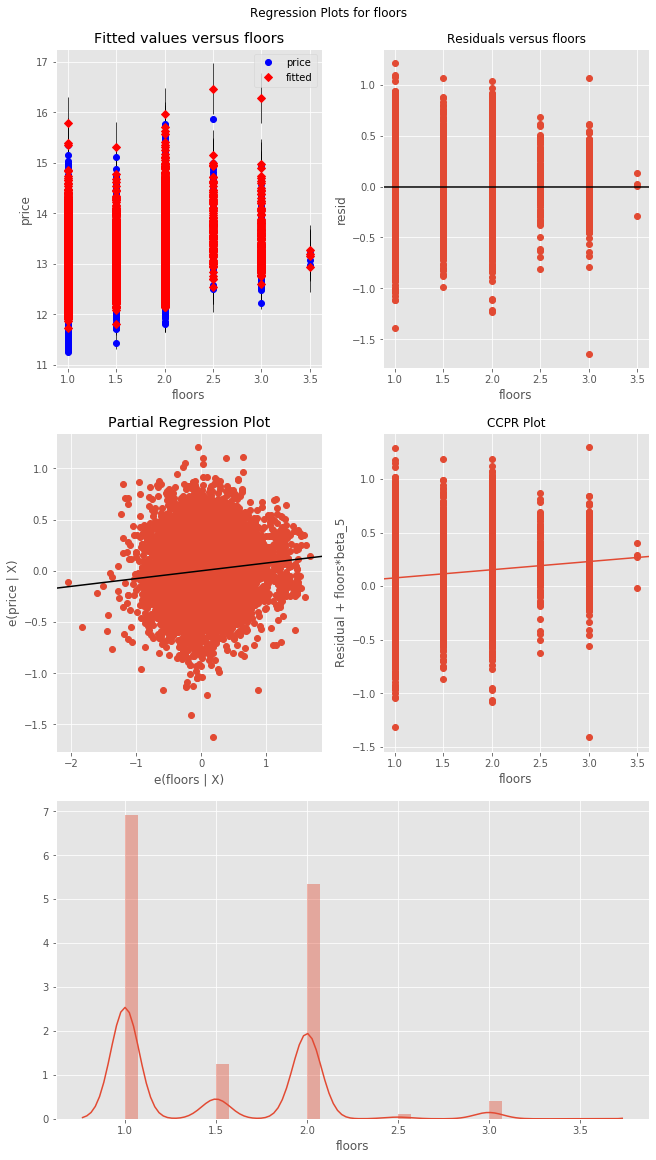

In [18]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals appears to be homoskedastic

In [19]:
continuous_features.append('floors')

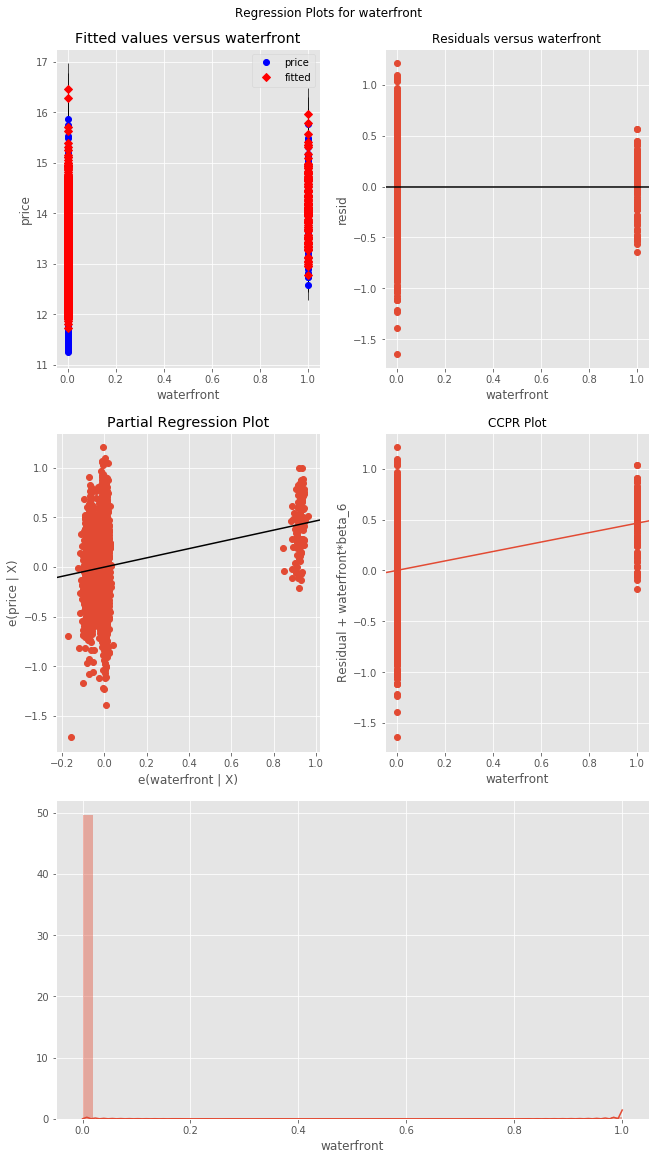

In [20]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low and VIF is low, therefore this p-value can be trusted
2. from given definition, this is a categorical feature
    1. We will add it to our list of known *categorical* features and then set it aside for now.
    2. We will deal with it with all *categorical* features later as a whole.

In [21]:
categorical_features.append('waterfront')

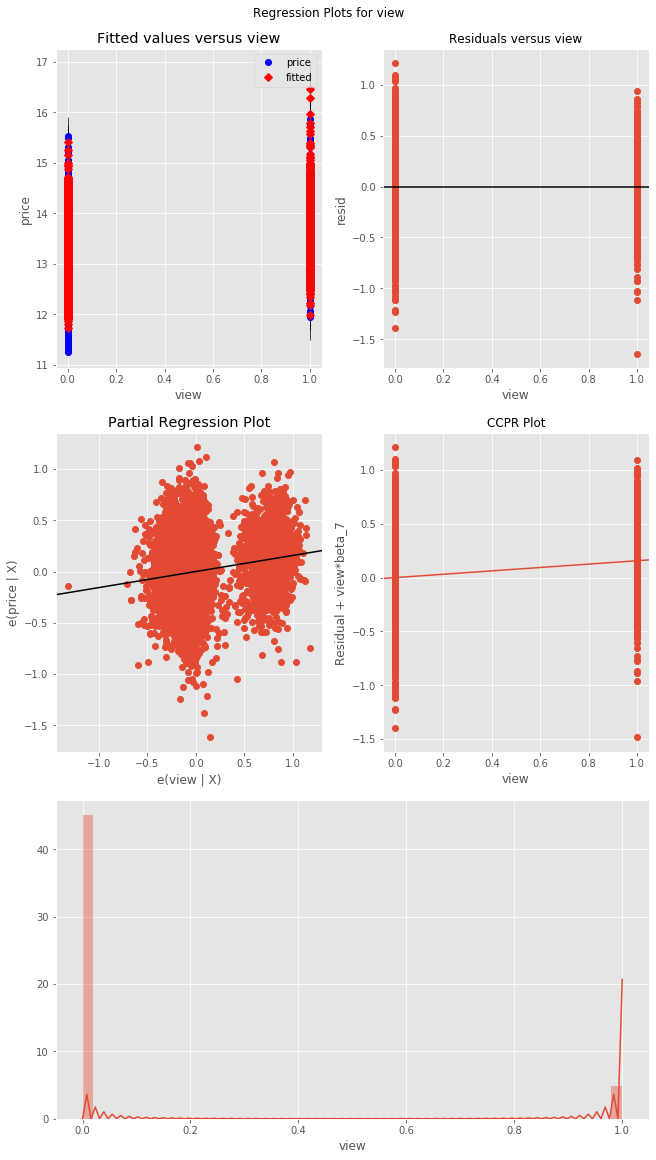

In [22]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low and VIF is low, therefore this p-value can be trusted
2. from given definition, this is a categorical feature
    1. We will add it to our list of known *categorical* features and then set it aside for now.
    2. We will deal with it with all *categorical* features later as a whole.

In [23]:
categorical_features.append('view')

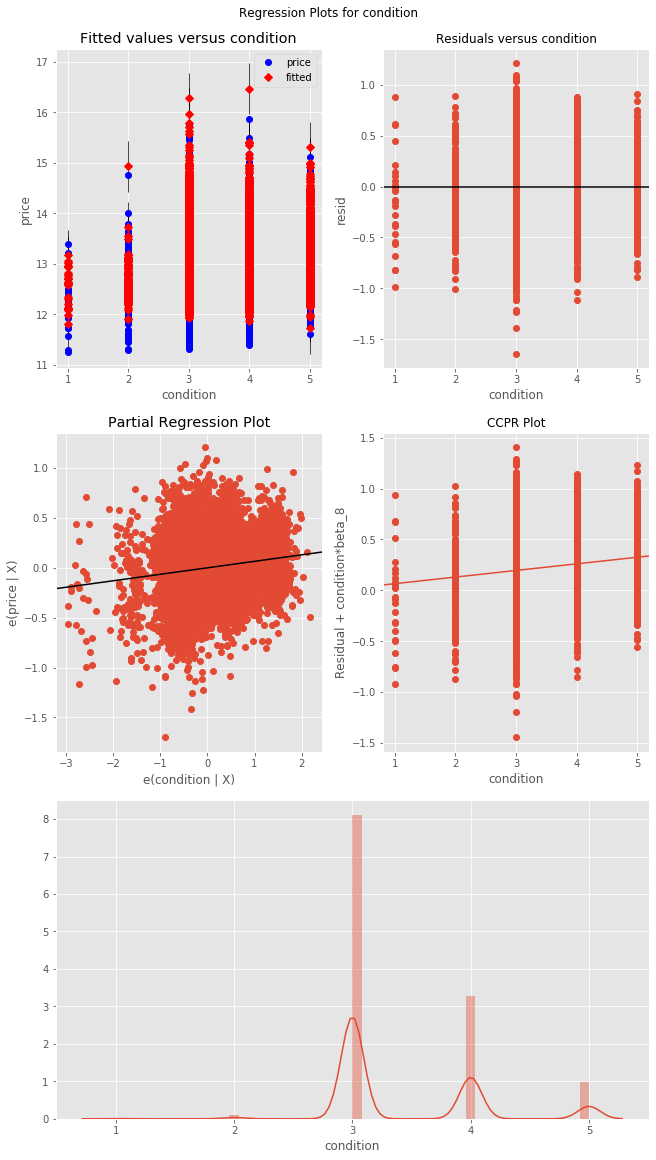

In [24]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature - it may not seem like it but all values are ordered
    1. distribution is more normal than not
    2. distribution of log-transformed residuals appears to be homoskedastic

In [25]:
continuous_features.append('condition')

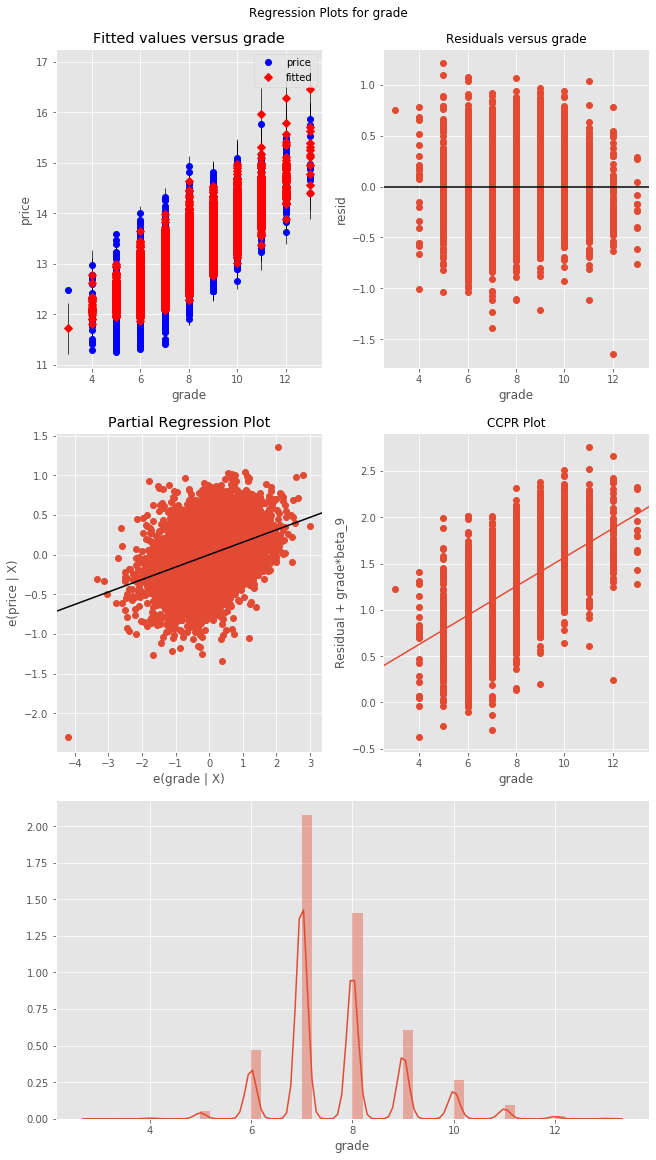

In [26]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature - it may not seem like it but all values are ordered
    1. distribution is not skewed
    2. distribution of log-transformed residuals appears to be homoskedastic

In [27]:
continuous_features.append('grade')

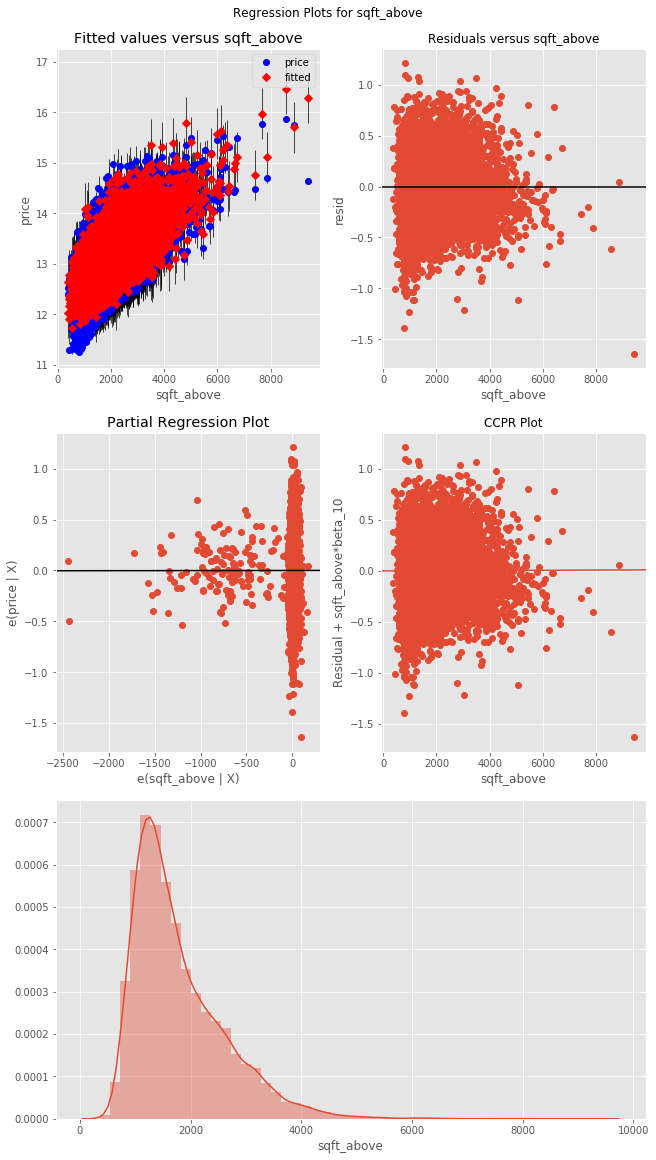

In [28]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is high and VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic

In [29]:
continuous_features.append('sqft_above')
lt_cont_feats.append('sqft_above')

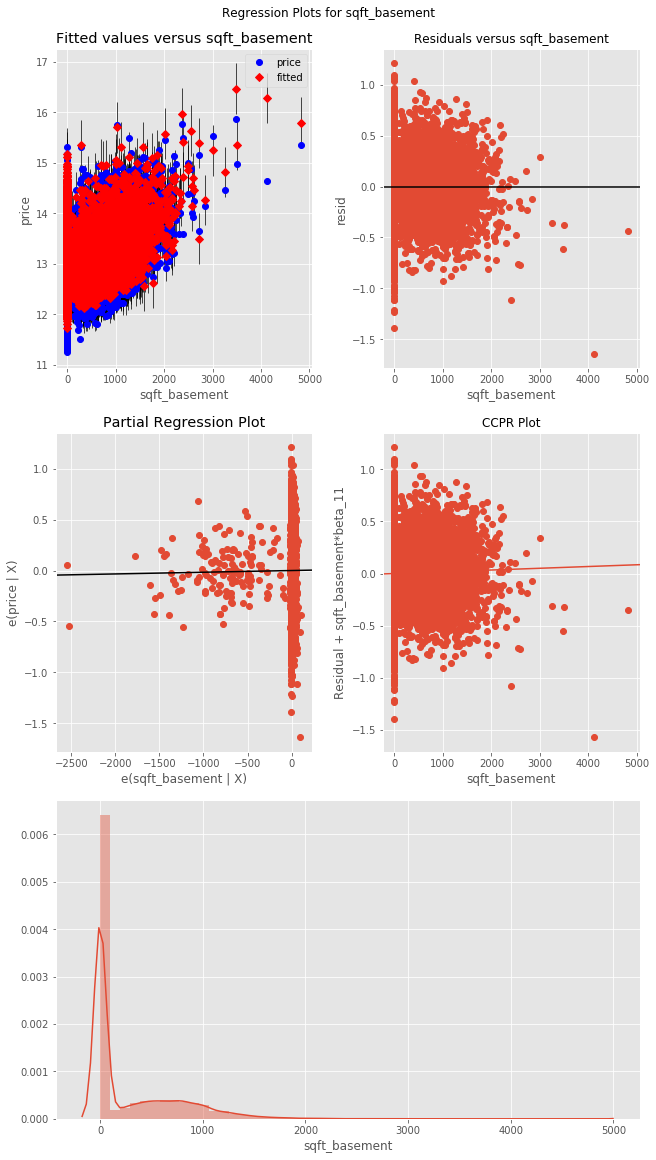

In [30]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is high and VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic
    
Note that there already appears to be a linear relationship between *log-transformed* **price** and non-log-transformed **sqft_basement**, but because its distribution is skewed we will log-transform it, nevertheless.

In [31]:
continuous_features.append('sqft_basement')
lt_cont_feats.append('sqft_basement')

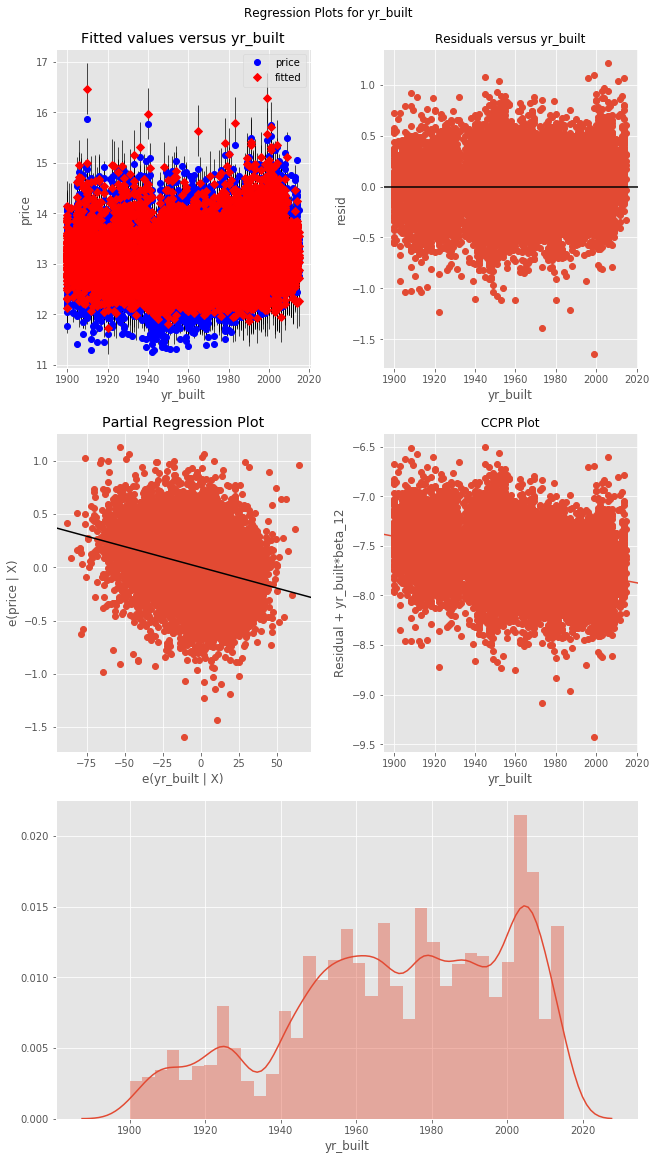

In [32]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is EXTREMELY high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature
    1. distribution seems skewed to the right
    2. distribution of log-transformed residuals appears to be homoskedastic

In [33]:
continuous_features.append('yr_built')

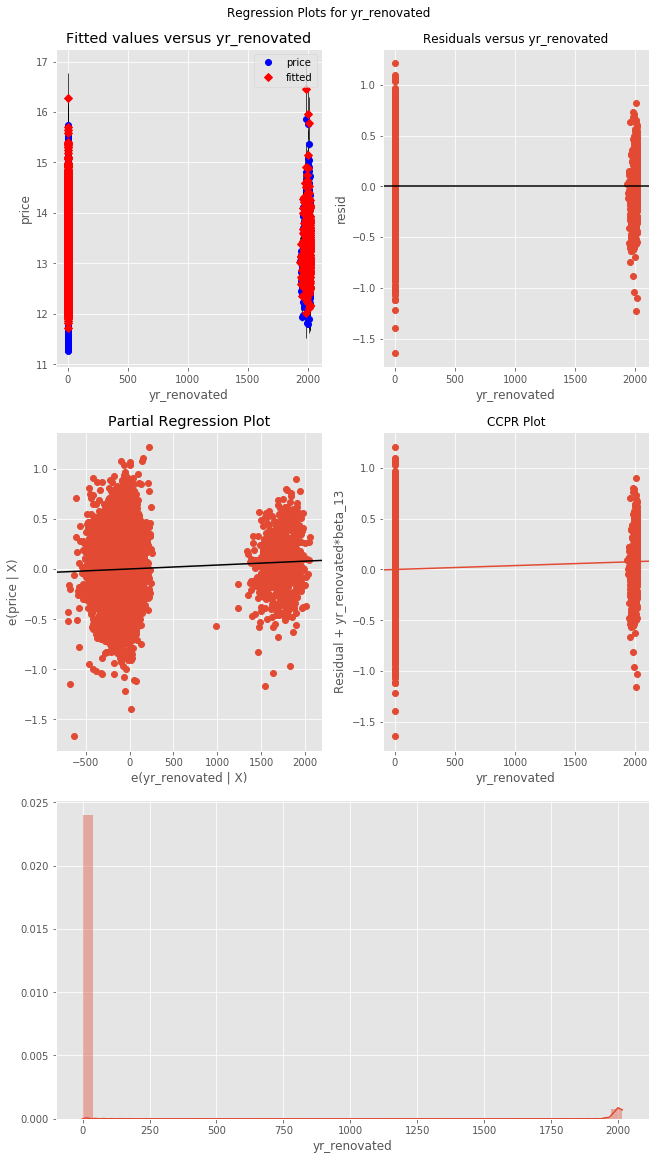

In [34]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low and VIF is low, therefore this p-value can be trusted
2. from given definition, this is a quantitative feature
3. distribution of log-transformed residuals appears to be homoskedastic

In [35]:
continuous_features.append('yr_renovated')

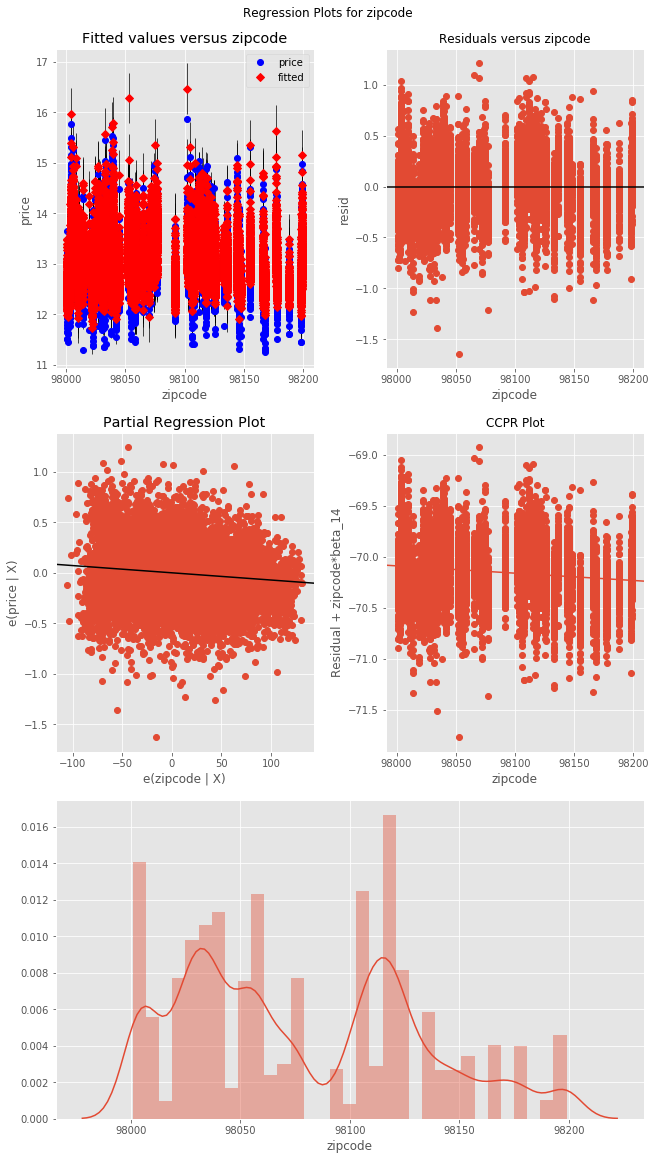

In [36]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is EXTREMELY high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a categorical feature
    1. We will add it to our list of known *categorical* features and then set it aside for now.
    2. We will deal with it with all *categorical* features later as a whole.

In [37]:
categorical_features.append('zipcode')

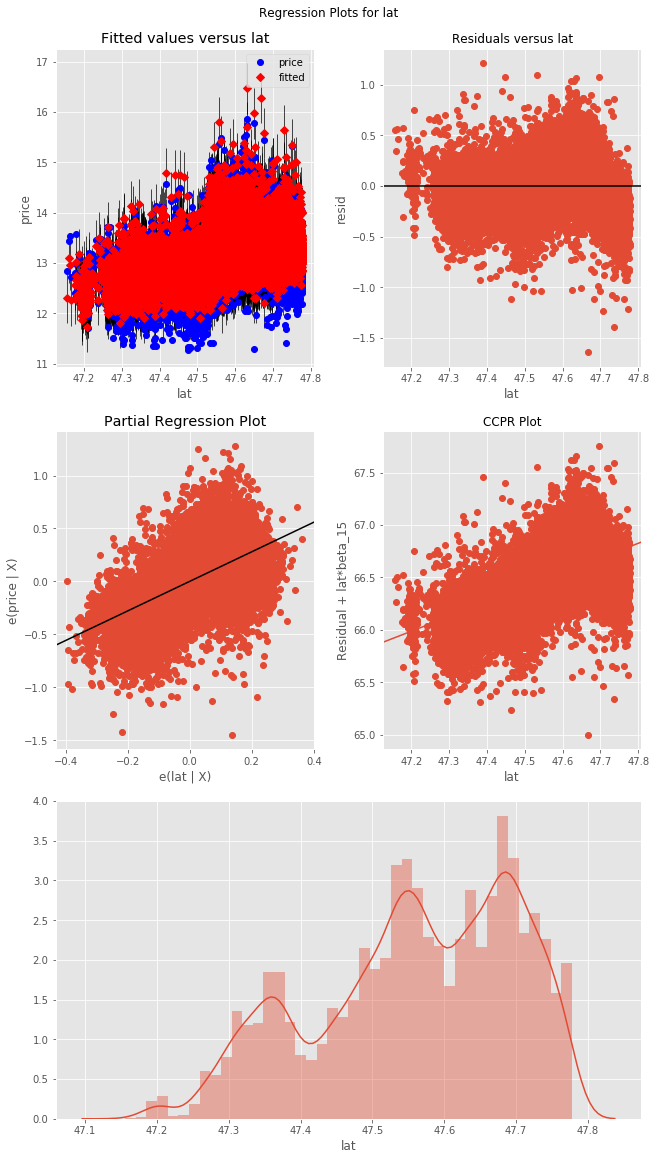

In [38]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is EXTREMELY high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature - it may not seem like it but all values are ordered
    1. distribution is skewed to the right
    2. distribution of log-transformed residuals appears to be homoskedastic
    
Note that intuitively we would like to think that there is some obvious relationship, probably not linear but some mapping, between **zipcode** and $(lat, long)$.  We will deal with this possibility later but now will simply consider **lat** a continuous feature.

In [39]:
continuous_features.append('lat')

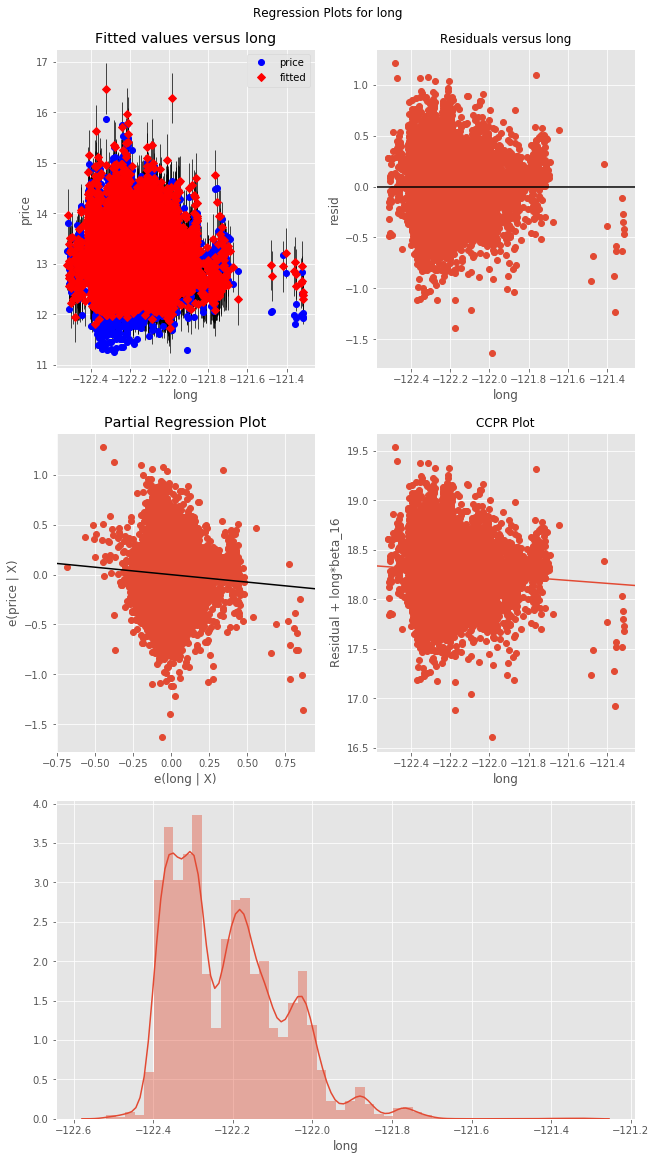

In [40]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is EXTREMELY high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature - it may not seem like it but all values are ordered
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic
    
Similar to **lat**, intuitively we would like to think that there is some obvious relationship, probably not linear but some mapping, between **zipcode** and $(lat, long)$.  We will deal with this possibility later but now will simply consider **long** a continuous feature.

In [41]:
continuous_features.append('long')

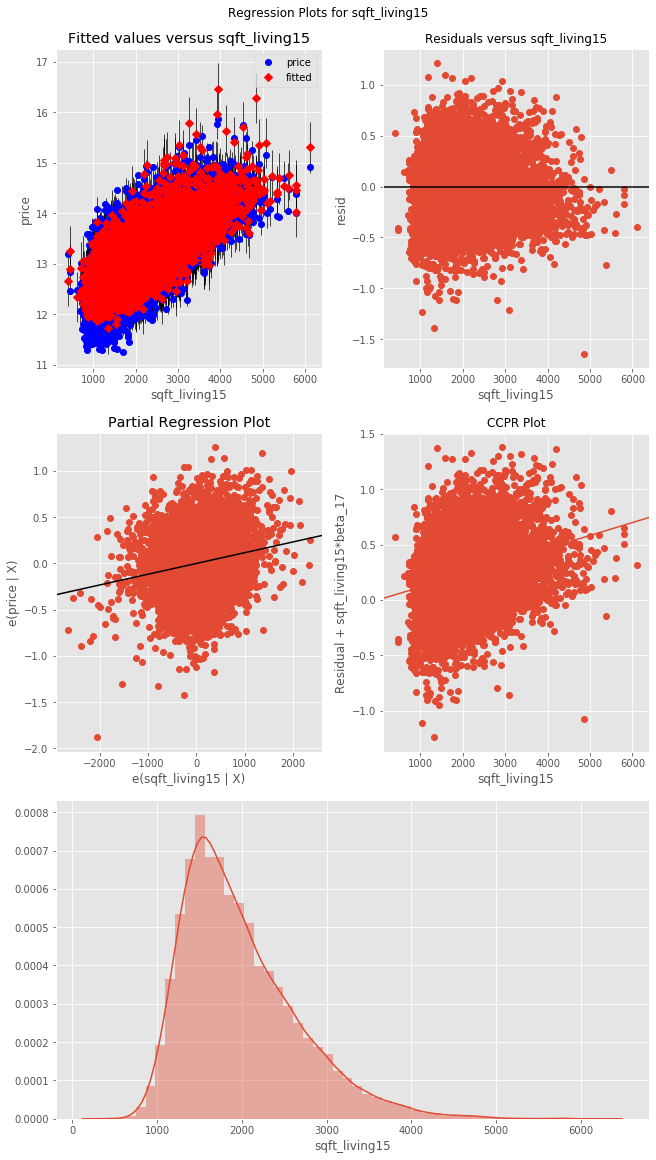

In [42]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low but VIF is high indicating colinearity, therefore this p-value should not be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic

In [43]:
continuous_features.append('sqft_living15')
lt_cont_feats.append('sqft_living15')

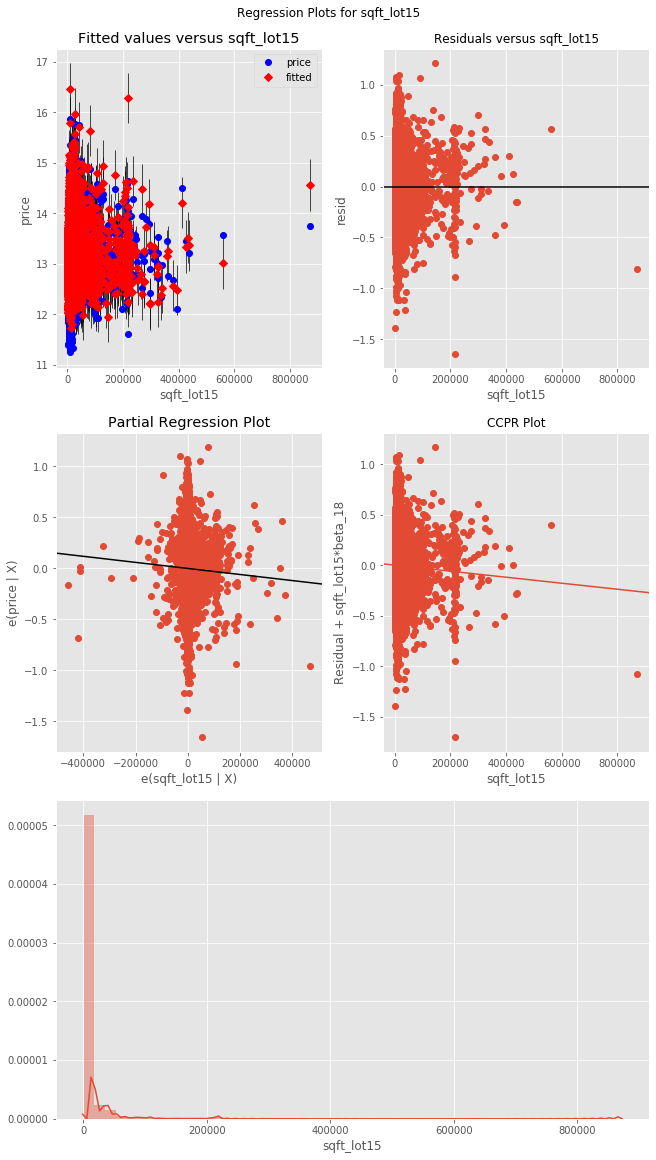

In [44]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

1. p-value is low and VIF is low, therefore this p-value can be trusted
2. from given definition, this is a quantitative feature
    1. distribution is skewed to the left
    2. distribution of log-transformed residuals is heteroskedastic

In [45]:
continuous_features.append('sqft_lot15')
lt_cont_feats.append('sqft_lot15')

In [46]:
curr_feat_idx += 1

if curr_feat_idx < len(preliminary_model_features):
    scjpnregression.feature_regression_summary(
        kchd_cleaned_with_log_transformed_target_df[preliminary_model_features]
        , curr_feat_idx
        , target
        , model_fit_results
        , display_regress_diagnostics=True
    )

In [47]:
#categorical features
display(HTML("<h3>Preliminary list of all <i>categorical</i> features:</h3>"))
s_html = "<ul>"
for cat_feat in categorical_features:
    s_html += "<li>{}</li>".format(cat_feat)
s_html += "</ul>"
display(HTML(s_html))
    
#continuous features
display(HTML("<h3>Preliminary list of ALL <i>continuous</i> features:</h3>"))
s_html = "<ul>"
for cont_feat in continuous_features:
    s_html += "<li>{}</li>".format(cont_feat)
s_html += "</ul>"
display(HTML(s_html))

## Step 4: Feature Scaling, Normalization, Transformation, and Categorization

The strategy is to **refine *continuous* vs. *categorical* features *separately* and then combine the results to build the final model**.

We have our features partitioned into our *preliminary* list of *continuous* and *categorical* features.

We will start with preprocessing our *continuous* features that need to be log-transformed.

Note that ALL continuous features will be normalized (min-max scaled).

In [48]:
nonlt_cont_feats = scjpnutils.list_difference(continuous_features, lt_cont_feats)

<br><br>
### Continuous Feature Transformation Preprocessing

Prior to *log-transforming* these features, we must pay careful attention to features with values $\le 0$ and either adopt a replacement heuristic for these values to make log-transformation possible OR we can opt to simply not transform such a feature.

Note that **long** contains negative values and also that **lat** and **long** are really components of an *ordered pair*.  Thus, if we *transform* or *scale* one (but not *translate*), we must do the same operation to the other.  Without doing anything to address negative values, we will not be able to use *log-transformation* on **long** (and subsequently **lat**).  

However, **we can perform *log-transformation* on *long* if we first *translate (shift to the right)* its *lower-bound* to $0$ by adding $-1 \cdot min(long)$ to the all values in the set**.  Note that we must follow up with a *hack* in order to perform *log-transformation* on values==$0$: **we will subsequently replace all instances of $0.0$ with $1$ *in order to make log-transformation possible* - note that $log(1)=0$**.

To summarize:
1. For **lat** and **long**:
    1. first *translate* the *range* of **long** to: $range_{transformed}(long)=[min(range_0(long))-min(range_0(long)), max(range_0(long))-min(range_0(long))]$; that is, $\forall v \in range_0(long): v_{transformed} = v-min(range_0(long))$
    2. since they constitute an *ordered pair*:
        1. *translation* of a componenent of the ordered pair - i.e. **long** - independently from the other is okay
        2. but  *transformation/scaling* operations must be done to both
2. For all continuous features (including **lat** and **long**), we will:
    1. replace all instances of 0.0 with 1 *in order to make log-transformation possible*, since $log(1)=0$
    2. do *min/max scaling*.
    
The following code preprocesses and prepares **lat** and **long** for *log-transformation*.

<br><br>
#### Preprocess *lat* and *long* for *log-transformation*

We must add $-1 \cdot min(long)$ to the all values in the set, and then replace all instances of $0.0$ with $1$ so that we can *log-transform* these features.

In [49]:
kchd_transformed_and_scaled_df = kchd_cleaned_df.copy()

#prep for log-tranformation
if 'long' in lt_cont_feats:
    kchd_transformed_and_scaled_df['long'] = kchd_transformed_and_scaled_df['long']-kchd_transformed_and_scaled_df['long'].min() # translation to [0, max(range(long)) - min(range(long))]
for lt_feature in lt_cont_feats:
    scjpnutils.clean_offending_values(
        kchd_transformed_and_scaled_df
        , numeric_replacement_rules=
            {
                lt_feature: [(0.0, 1)]
            }
        , friendly_name_of_df="Preliminary Features in King County House Sales DF to be log-transformed"
    )

*** CLEANING VALUES of Preliminary Features in King County House Sales DF to be log-transformed: BEGIN ***
Rules for 'bedrooms' column value replacement are: [(0.0, 1)]
Looking for rows with 'bedrooms' values [0.0] ...
There are no rows that contain values of 'bedrooms' in [0.0]!
*** CLEANING VALUES of Preliminary Features in King County House Sales DF to be log-transformed: END ***
*** CLEANING VALUES of Preliminary Features in King County House Sales DF to be log-transformed: BEGIN ***
Rules for 'bathrooms' column value replacement are: [(0.0, 1)]
Looking for rows with 'bathrooms' values [0.0] ...
There are no rows that contain values of 'bathrooms' in [0.0]!
*** CLEANING VALUES of Preliminary Features in King County House Sales DF to be log-transformed: END ***
*** CLEANING VALUES of Preliminary Features in King County House Sales DF to be log-transformed: BEGIN ***
Rules for 'sqft_living' column value replacement are: [(0.0, 1)]
Looking for rows with 'sqft_living' values [0.0] ...


Both **lat** and **long** are now ready for *log-transformation*.

We can now not only perform log-transformation on **lat** and **long**, but on the rest of the remaining *continuous* features that need to be *log-transformed*, as well.  **We will also perform *min-max scaling***.

In [50]:
normalized_feats = continuous_features.copy()
print("\nThe following continuous features will be log-transformed:\n{}".format(lt_cont_feats))
print("\nThe following continuous features will NOT be log-transformed:\n{}".format(nonlt_cont_feats))
print("\nThe following continuous features will be min-max scaled:\n{}".format(normalized_feats))

# we'll need these later
orig_normalized_feats = normalized_feats.copy()
orig_lt_cont_feats = lt_cont_feats.copy()
orig_nonlt_cont_feats = nonlt_cont_feats.copy()
orig_continuous_features = continuous_features.copy()
orig_categorical_features = categorical_features.copy()


The following continuous features will be log-transformed:
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

The following continuous features will NOT be log-transformed:
['floors', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'long']

The following continuous features will be min-max scaled:
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


<br><br>
### Perform *log-transformation* and *min-max scaling* on continuous features

In [51]:
# log-transformation
kchd_transformed_and_scaled_df = scjpnutils.log_transform(
    kchd_transformed_and_scaled_df
    , lt_cont_feats
)

# min-max scaling
kchd_transformed_and_scaled_df = scjpnutils.min_max_scaling(
    kchd_transformed_and_scaled_df
    , normalized_feats
)

<br><br>
### Perform *log-transformation* and *min-max scaling* on target, price

Don't forget that **our target feature (*price*) should be log-transformed** (and scaled), as well, *based on the results from our Preliminary Linear Regression Model*. 

In [52]:
kchd_transformed_and_scaled_df[[target]].describe().loc[['min', 'max']]

price
min    78000.0
max  7700000.0

In [53]:
kchd_transformed_and_scaled_df = scjpnutils.min_max_scaling(
    scjpnutils.log_transform(
        kchd_transformed_and_scaled_df
        , [target]
    )
    , [target]
)

<br><br>
#### Ranges of *log-transformed* and *min-max scaled* *continuous* features and target, *price*:

In [54]:
target_plus_cont_feats = [target]
target_plus_cont_feats.extend(continuous_features)
kchd_transformed_and_scaled_df[target_plus_cont_feats].describe().loc[['min', 'max']]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
min    0.0       0.0        0.0          0.0       0.0     0.0        0.0   
max    1.0       1.0        1.0          1.0       1.0     1.0        1.0   

     grade  sqft_above  sqft_basement  yr_built  yr_renovated  lat  long  \
min    0.0         0.0            0.0       0.0           0.0  0.0   0.0   
max    1.0         1.0            1.0       1.0           1.0  1.0   1.0   

     sqft_living15  sqft_lot15  
min            0.0         0.0  
max            1.0         1.0

<br><br>
### Distributions and Linearity Study, after scaling/transforming *continuous* features (and target)

Now let's have a look at our scaled and transformed data (*continuous* features).

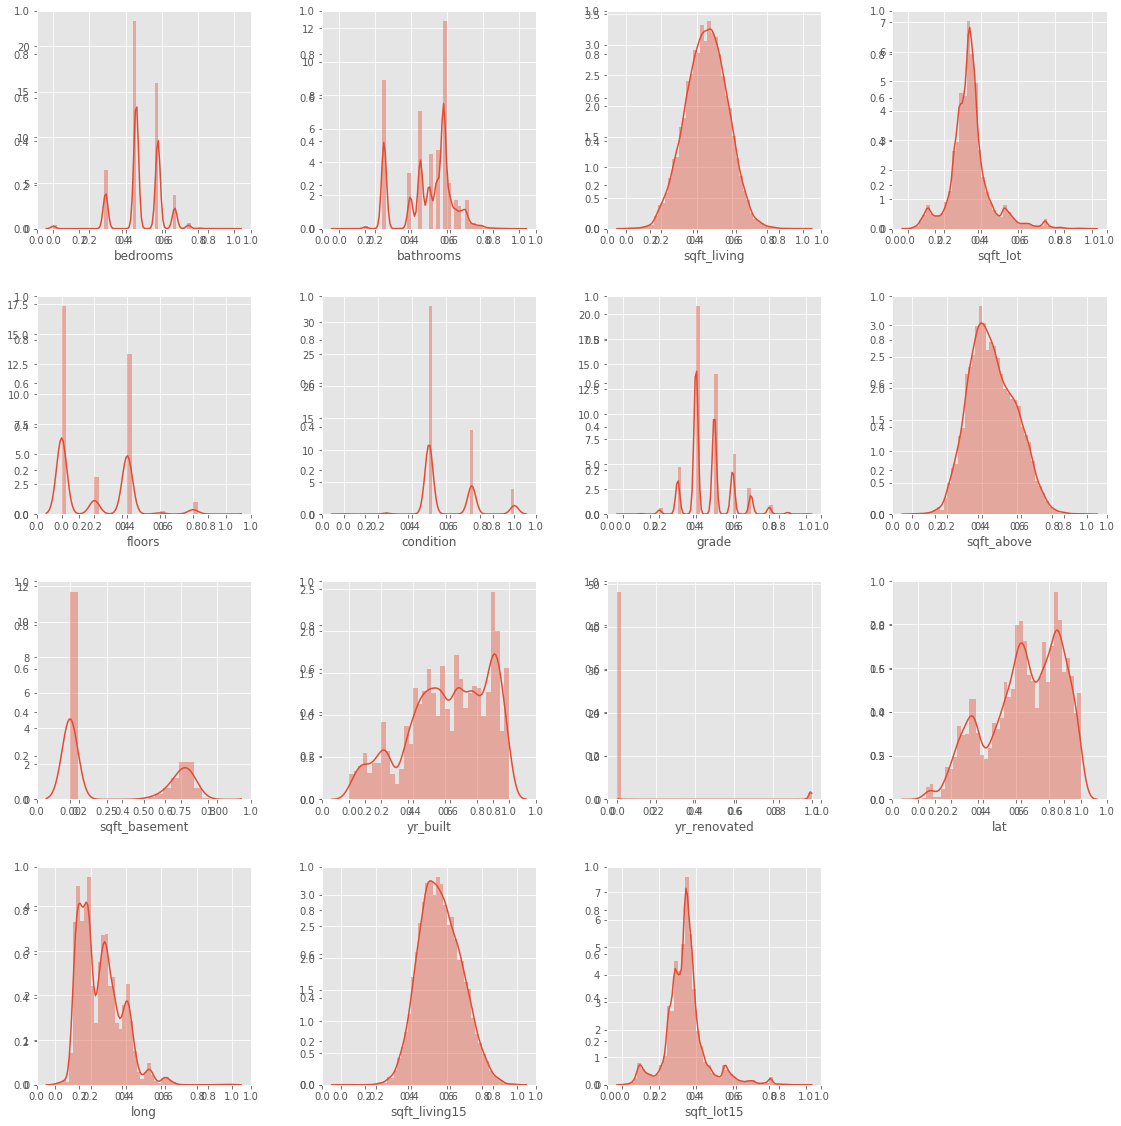

In [55]:
scjpnregression.histograms(kchd_transformed_and_scaled_df[continuous_features]);

After *log-transforming* our *continuous* features (*as well as our target feature*), we see that their distributions are more normal, with several exceptions with skewed distributions:
1. **floors**
2. **sqft_basement**
3. **yr_built**
4. **yr_renovated**
5. **lat**
6. **long**.  

In terms of distributions (after transformation), those features are about as good as they're going to get. 

Nevertheless, **we should expect the performance of a new linear regression based on this newly scaled/transformed data to perform "better" than the last one** - here "better" means more accurately predicting **price** with less multicolinearity, not necessarily a higher $R^2$ value.

Before building a new linear regression model, let's take a look at the scatterplots of our log-transformed data to see if it improves any apparent linearity between the target, **price**, which has also been log-transformed based on the hints we gleaned from the first model.

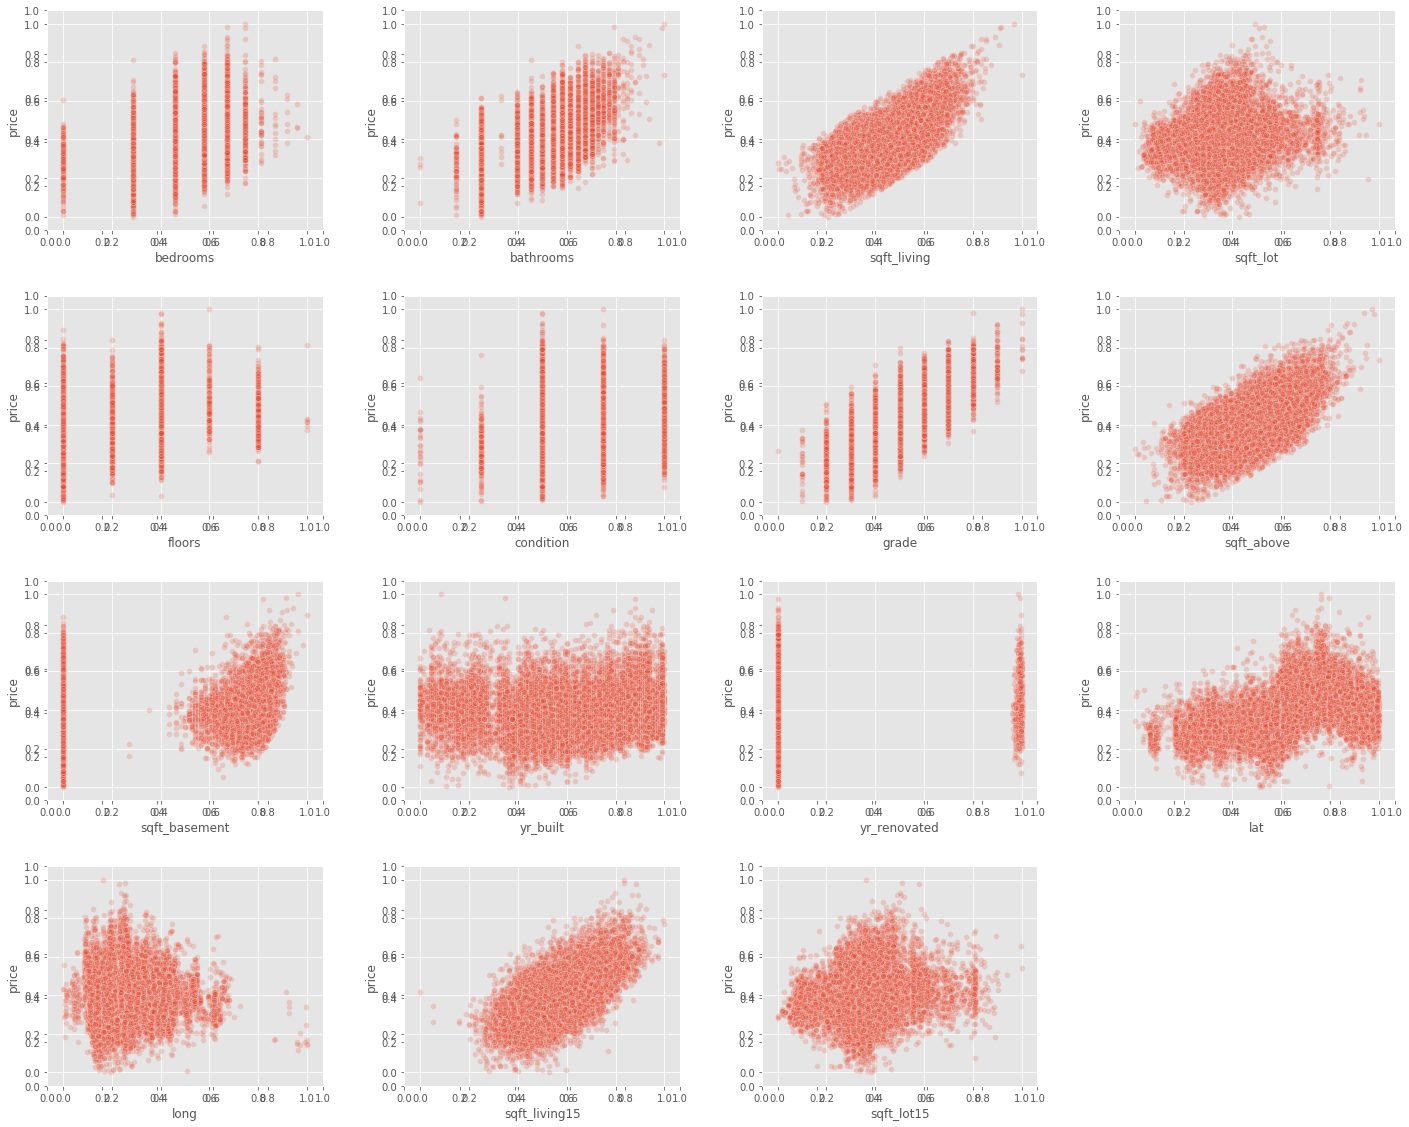

In [56]:
scjpnregression.scatter_plots(
    kchd_transformed_and_scaled_df[target_plus_cont_feats]
    , target
)

At first glance, log-transformation has made a big difference (for the better) in linearity between the target and most continuous features.

In [57]:
def html_lt_format_li(cont_feat, linear_desc=""):
    return "<li>({}<i>log-transformed</i>) <b>{}</b>{}</li>".format("NOT " if cont_feat not in lt_cont_feats else "", cont_feat, linear_desc)

# strong linearity
display(HTML("There is apparently STRONG linearity between <i>log-transformed</i> <b>price</b> and:"))
s_html = "<ol>"
s_html += html_lt_format_li("bedrooms")
s_html += html_lt_format_li("bathrooms")
s_html += html_lt_format_li("sqft_living")
s_html += html_lt_format_li("grade")
s_html += html_lt_format_li("sqft_above")
s_html += html_lt_format_li("sqft_living15")
s_html += "</ol>"
display(HTML(s_html))

# not strong linearity
display(HTML("But for the remaining log-transformed continuous features below, linearity between the <i>log-transformed</i> target, <b>price</b>, is debatable:"))
s_html = "<ol>"
s_html += html_lt_format_li("sqft_lot", " (moderate)")
s_html += html_lt_format_li("floors", " (slight)")
s_html += html_lt_format_li("condition", " (slight to none?)")
s_html += html_lt_format_li("sqft_basement", " (moderate to strong)")
s_html += html_lt_format_li("yr_built", " (none?)")
s_html += html_lt_format_li("yr_renovated", " (slight to none?)")
s_html += html_lt_format_li("lat", " (slight to moderate)")
s_html += html_lt_format_li("long", " (slight to none)")
s_html += html_lt_format_li("sqft_lot15", " (slight to moderate)")
s_html += "</ol>"
display(HTML(s_html))

<br><br>
### Study of lineary between *log-tranformed* target, *price*, vs. *categorical* features

For completeness, let's carry out the same linearity study between *log-transformed* **price** and *categorical* features.

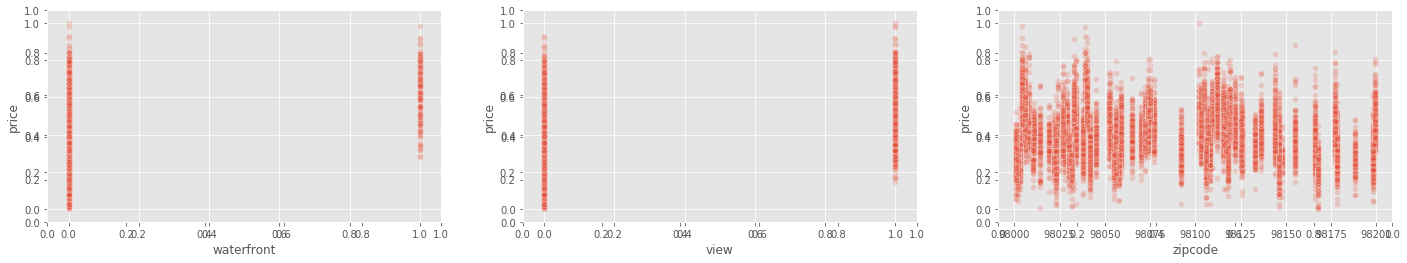

In [58]:
target_plus_cat_feats = [target]
target_plus_cat_feats.extend(categorical_features)
scjpnregression.scatter_plots(
    kchd_transformed_and_scaled_df[target_plus_cat_feats]
    , target
)

<br><brb>
    
#### Conclusion
**zipcode** does not appear to manifest linearity vs. log-transformed **price**, while the other categorical features do.

So we can now commit to dropping **zipcode**.

In [59]:
cat_feats_to_drop = ['zipcode']
for cat_feat_to_drop in cat_feats_to_drop:
    categorical_features.remove(cat_feat_to_drop)

kchd_transformed_and_scaled_df = kchd_transformed_and_scaled_df.drop(cat_feats_to_drop, axis=1)

<br><br>
### Preliminary Regression Model v 2.0, after linearity study following *log-transformation* of *continuous* features

Theoretically, a new model based on *log-transformed* *continuous* features should demonstate a more predictive linear relationship vs. *log-transformed* **price**.

The hypotheses are as follows:
<br><br>
$H_0$: There is no linear relationship between *log-transformed* target, **price** vs. the set of *log-transformed* *continuous* features OR the model is less reliably predictive (increased $\Delta RMSE$ OR increased multicolinearity/Condtion No.).
<br><br>
$H_a$: Some linear relationship exists between *log-transformed* target, **price** vs. the set of *log-transformed* *continuous* features AND the model is not less reliably predictive (non-decreased $\Delta RMSE$ and non-decreased multicolinearity/Condtion No.).


formula: price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15


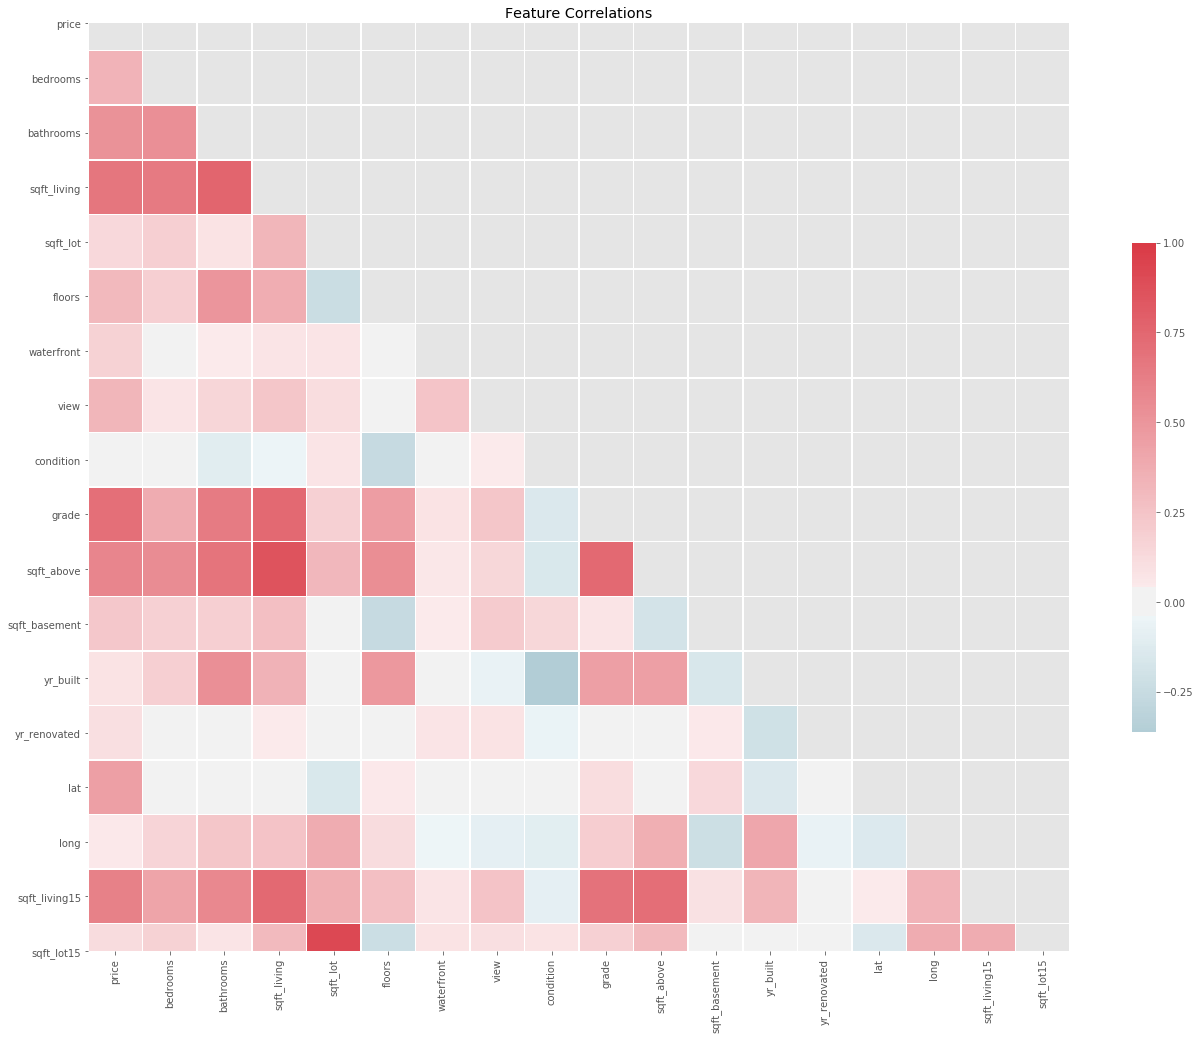

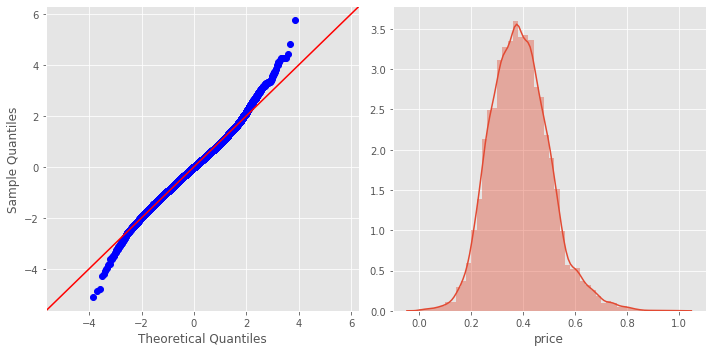

In [60]:
prev_sel_features = sel_features
prev_train_score = train_score
prev_test_score = test_score
prev_model = model
(
    sel_features
    , X_train
    , X_test
    , y_train
    , y_test
    , train_score
    , test_score
    , model
) = scjpnregression.lin_reg_model(
    kchd_transformed_and_scaled_df.drop(['id', 'date'], axis=1)
    , target
    , title="Preliminary Regression Model v 2.0, after linearity study following <i>log-transformation</i> of <i>continuous</i> features:"
)

prev_good_vif_features = good_vif_features
prev_bad_vif_features = bad_vif_features
prev_model_fit_results = model_fit_results
(model_fit_results, good_vif_features, bad_vif_features) = scjpnregression.model_fit_summary(
    kchd_transformed_and_scaled_df.drop(['id', 'date'], axis=1)
    , sel_features
    , target
    , model
    , train_score
    , test_score
    , mv_r_sq_th
    , mv_delta_score_th
    , mv_bad_vif_ratio_th
)

<br><br>
### Preliminary Regression Model v 2.0, committed *continuous* (including *transformed*) vs. *categorical* features (not binned): ANALYSIS

#### By how much have we improved from the last model?

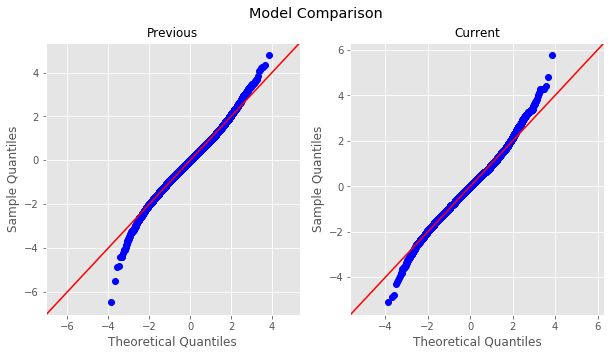

In [61]:
scjpnregression.mfrs_comparison(
    models=[prev_model, model]
    , mfrs=[prev_model_fit_results, model_fit_results]
    , scores_dict={
        'method': scjpnregression.rmse_train_and_rmse_test
        , 'scores': [(prev_train_score, prev_test_score), (train_score, test_score)]
    }
)

We see that our $R^2$ has only slightly dropped after feature-tuning with the guidance of regression diagnostics.

$RMSE$ and $\Delta RMSE$ have dropped quite a bit.  

$\Delta RMSE$ has improved by a factor of 5!

By virtue of the **drop in *Condition Number***, we see that **multicolinearity has been almost completely mitigated**!

**This model manifests a kurtosis that is clearly platykurtic**.  It's not ideal but at least it's not leptokurtic.  We have significantly improved kurtosis in residuals at the low-end tail but it is slightly worse on the high-end.  Overall, however, distribution of residuals (kurtosis) has improved.  But, we may be able to do more to produce a more mesokurtic distribtion in residuals.

**This is a MAJOR improvement**.

#### Which hypothesis?
1. clearly, there is a linear relationship between *log-transformed* **price** vs. *transformed* and/or *scaled* *continuous* features.
2. clearly, $\Delta RMSE$ has decreased!
3. clear, multicolinearity has improved (decreased Condition No.)

<br><br>
#### Conclusion:
We can confidently reject $H_0$ and accept $H_a$.  Thus, **this model *reliably* predicts *price* whereas the last one did not** - i.e. ***log-transforming* (the appropriate selection of) *continuous* features was definitely the right thing to do**.

<br><br>
#### What can we do to improve its performance?
Let's try to improve the situation by reducing colinearity even more, without sacrificing too much predictive power - i.e. with too much of a drop in $R^2$.

<br><br>
We start by dropping the obvious correlated features, *according to the correlation matrix and $VIF$ summary*:
- **sqft_living**: $VIF=375.27$, the highest of all
- next highest $VIF=293.75$ and stems from **sqft_above**
    - cross-referencing its highest correlation in the matrix lists **sqft_living**, so dropping **sqft_living** should address much of the colinearity in **sqft_above**
    - therefore, **sqft_above** will NOT be dropped
- next highest $VIF$ after that is $70.14$ and stems from **sqft_lot**
    - cross-referencing its highest correlation in the matrix lists **sqft_lot15**
    - dropping **sqft_lot15** should address much of the colinearity in **sqft_lot**
    - therefore, **sqft_lot** will NOT be dropped
- next highest $VIF$ after that is $68.8$ and stems from **sqft_lot15**
    - looking at its correlations in the matrix we find that it is colinear with many other features
    - therefore, **sqft_lot15** will be dropped
- next highest $VIF$ after that is $62.25$ and stems from **sqft_living15**
    - looking at its correlations in the matrix we find that it is colinear with many other features
    - therefore, **sqft_living15** will be dropped
- **condition** has a low $VIF$ value
    - but perhaps more illuminating is that ***condition* has a low correlation to the target, *price***
    - therefore, **condition** will be dropped

<br><br>
To summarize, dropping the following should produce a model we can rely on, with less multicolinearity:
1. **sqft_living**
2. **sqft_lot15**
3. **sqft_living15**
4. **condition**

<br><br>
### Preliminary Regression Model v 3.0, after dropping the "most" colinear theorized features:

The hypotheses are as follows:
<br><br>
$H_0$: There is no linear relationship between *log-transformed* target, **price** vs. the reduced set of *theorized* features OR the model is less reliably predictive (increased $\Delta RMSE$ OR increased multicolinearity/Condtion No.).
<br><br>
$H_a$: Some linear relationship exists between *log-transformed* target, **price** vs. the reduced set of *theorized* features AND the model is not less reliably predictive (non-decreased $\Delta RMSE$ and non-decreased multicolinearity/Condtion No.).

current feature set: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'view']
theorized drop features: ['sqft_living', 'sqft_living15', 'sqft_lot15', 'condition']
after dropping theorized features remaining continuous features are: ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']
after dropping theorized features remaining categorical features are: ['waterfront', 'view']



formula: price~bedrooms+bathrooms+sqft_lot+floors+grade+sqft_above+sqft_basement+yr_built+yr_renovated+lat+long+waterfront+view


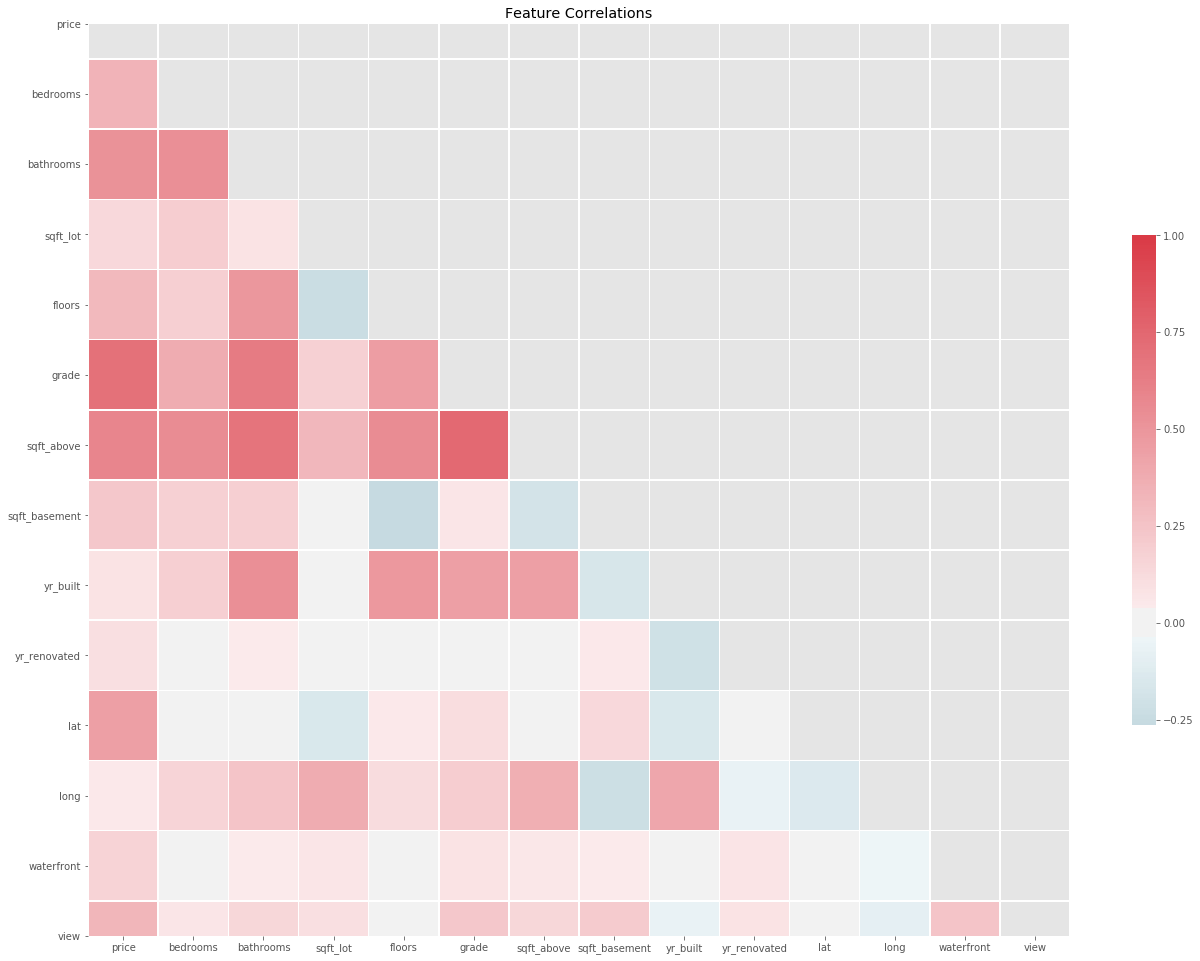

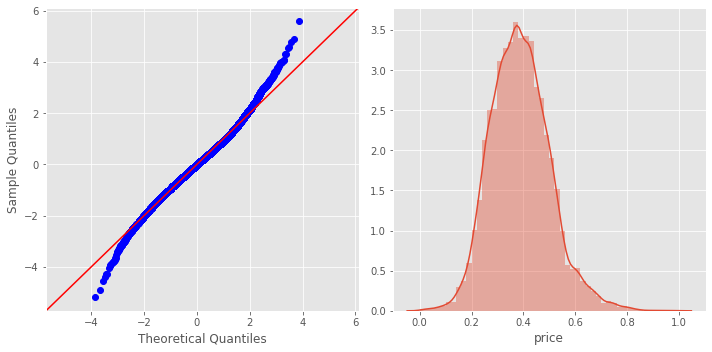

In [62]:
print("current feature set: {}".format(continuous_features + categorical_features))
theorized_drop_feats = ['sqft_living', 'sqft_living15', 'sqft_lot15', 'condition']
print("theorized drop features: {}".format(theorized_drop_feats))
theorized_continuous_features = continuous_features.copy()
theorized_categorical_features = categorical_features.copy()
for theorized_drop_feat in theorized_drop_feats:
    if theorized_drop_feat in theorized_continuous_features:
        theorized_continuous_features.remove(theorized_drop_feat)
    if theorized_drop_feat in theorized_categorical_features:
        theorized_categorical_features.remove(theorized_drop_feat)
theorized_feats = theorized_continuous_features + theorized_categorical_features
print("after dropping theorized features remaining continuous features are: {}".format(theorized_continuous_features))
print("after dropping theorized features remaining categorical features are: {}".format(theorized_categorical_features))

prev_sel_features = sel_features
prev_train_score = train_score
prev_test_score = test_score
prev_model = model
(
    sel_features
    , X_train
    , X_test
    , y_train
    , y_test
    , train_score
    , test_score
    , model
) = scjpnregression.lin_reg_model(
    kchd_transformed_and_scaled_df.drop(['id', 'date'], axis=1)[[target] + theorized_feats]
    , target
    , title="Preliminary Regression Model v 3.0, after dropping \"most\" colinear theorized features:"
)

prev_good_vif_features = good_vif_features
prev_bad_vif_features = bad_vif_features
prev_model_fit_results = model_fit_results
(model_fit_results, good_vif_features, bad_vif_features) = scjpnregression.model_fit_summary(
    kchd_transformed_and_scaled_df.drop(['id', 'date'], axis=1)[[target] + theorized_feats]
    , sel_features
    , target
    , model
    , train_score
    , test_score
    , mv_r_sq_th
    , mv_delta_score_th
    , mv_bad_vif_ratio_th
)

<br><br>
### Preliminary Regression Model v 3.0, after dropping the "most" colinear theorized features: ANALYSIS

#### By how much have we improved from the last model?

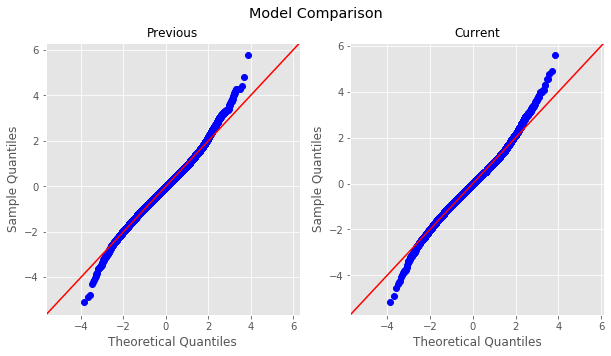

In [63]:
scjpnregression.mfrs_comparison(
    models=[prev_model, model]
    , mfrs=[prev_model_fit_results, model_fit_results]
    , scores_dict={
        'method': scjpnregression.rmse_train_and_rmse_test
        , 'scores': [(prev_train_score, prev_test_score), (train_score, test_score)]
    }
)

We see that our $R^2$ has dropped by a fair amount after dropping the theorized "most" colinear features.

But this new $R^2$ is still very respectable.

**The difference between $R^2$ and Adjusted $R^2$ has shrunk**.  This makes sense since we removed the most colinear features.

**$\Delta RMSE$ has improved** again.

Also, ***Condition Number* improved** again, for an even further mitigation of multicolinearity.

I would say that the distribution of residuals is "more" mesokurtic than previously (but is still platykurtic).  But more importantly is that **the qq-plot is smoother and therefore offers *less erratic predictions***.

**This is an improvement over the last model**.

<br><br>
#### Conclusion:
Clearly we can reject $H_0$ and accept $H_a$.  That is, **dropping *sqft_living*, *sqft_living15*, *sqft_lot15*, and *condition* produced a more predictive, reliable model**.

<br><br>
#### What can we do to improve its performance?
We notice in the correlation matrix that **sqft_above** is strongly correlated to **grade** and moderately related to several others.  It would make for a good candidate to additionally drop.

<br><br>
### Preliminary Regression Model v 4.0, after dropping "most" colinear theorized features (including *sqft_above*):

The hypotheses are as follows:
<br><br>
$H_0$: There is no linear relationship between *log-transformed* target, **price** vs. the reduced set of *theorized* features (additionally removed **sqft_above**) OR the model is less reliably predictive (increased $\Delta RMSE$ OR increased multicolinearity/Condtion No.).
<br><br>
$H_a$: Some linear relationship exists between *log-transformed* target, **price** vs. the reduced set of *theorized* features (additionally removed **sqft_above**) AND the model is not less reliably predictive (non-decreased $\Delta RMSE$ and non-decreased multicolinearity/Condtion No.).

current feature set: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'view']
theorized drop features: ['sqft_living', 'sqft_living15', 'sqft_lot15', 'condition', 'sqft_above']
after dropping theorized features remaining continuous features are: ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']
after dropping theorized features remaining categorical features are: ['waterfront', 'view']



formula: price~bedrooms+bathrooms+sqft_lot+floors+grade+sqft_basement+yr_built+yr_renovated+lat+long+waterfront+view


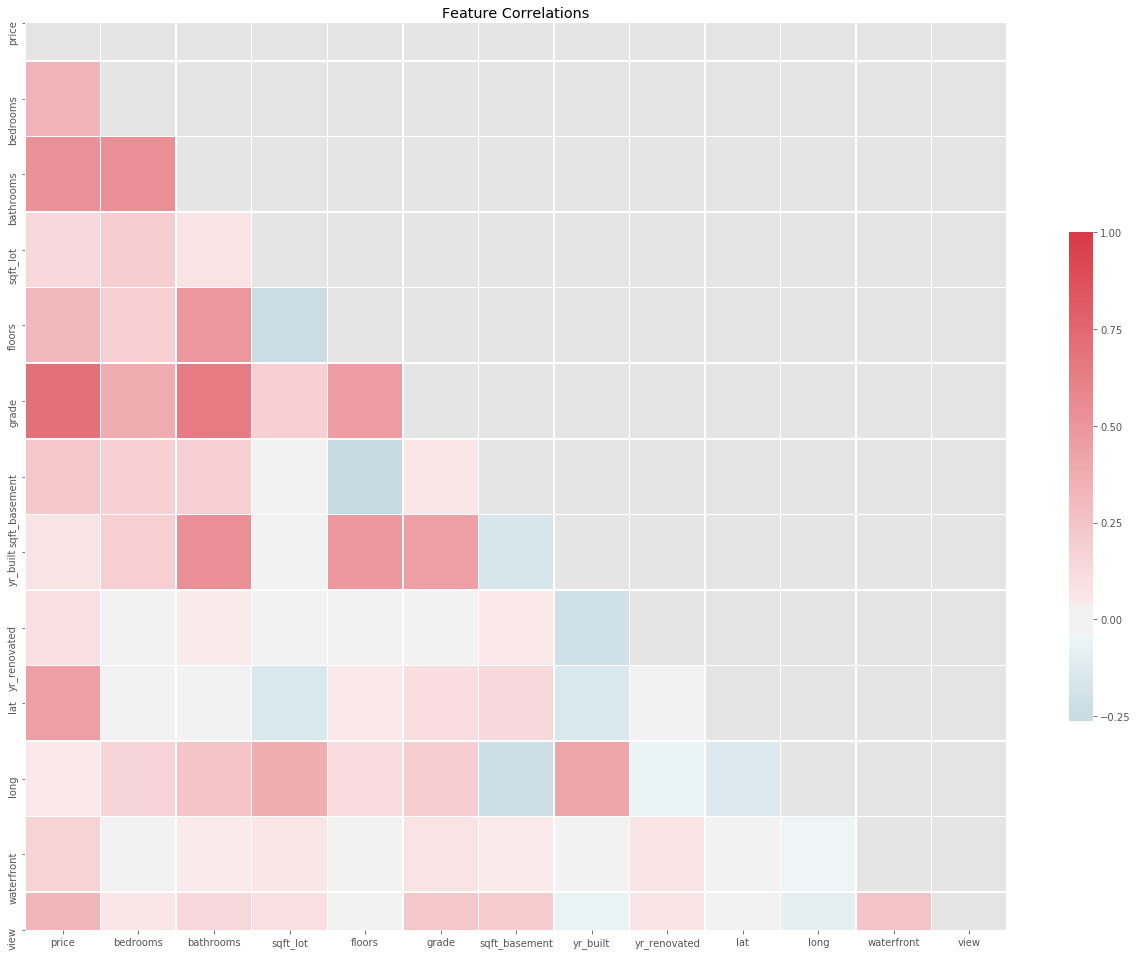

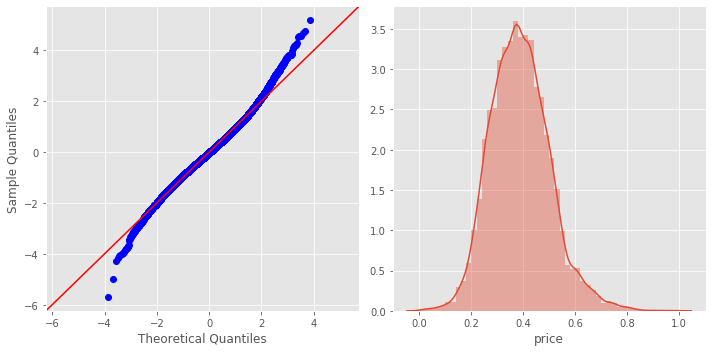

In [64]:
print("current feature set: {}".format(continuous_features + categorical_features))
theorized_drop_feats.extend(['sqft_above'])
print("theorized drop features: {}".format(theorized_drop_feats))
theorized_continuous_features = continuous_features.copy()
theorized_categorical_features = categorical_features.copy()
for theorized_drop_feat in theorized_drop_feats:
    if theorized_drop_feat in theorized_continuous_features:
        theorized_continuous_features.remove(theorized_drop_feat)
    if theorized_drop_feat in theorized_categorical_features:
        theorized_categorical_features.remove(theorized_drop_feat)
theorized_feats = theorized_continuous_features + theorized_categorical_features
print("after dropping theorized features remaining continuous features are: {}".format(theorized_continuous_features))
print("after dropping theorized features remaining categorical features are: {}".format(theorized_categorical_features))

prev_sel_features = sel_features
prev_train_score = train_score
prev_test_score = test_score
prev_model = model
(
    sel_features
    , X_train
    , X_test
    , y_train
    , y_test
    , train_score
    , test_score
    , model
) = scjpnregression.lin_reg_model(
    kchd_transformed_and_scaled_df.drop(['id', 'date'], axis=1)[[target] + theorized_feats]
    , target
    , title="Preliminary Regression Model v 4.0, after dropping \"most\" colinear theorized features (including <b>sqft_above</b>):"
)

prev_good_vif_features = good_vif_features
prev_bad_vif_features = bad_vif_features
prev_model_fit_results = model_fit_results
(model_fit_results, good_vif_features, bad_vif_features) = scjpnregression.model_fit_summary(
    kchd_transformed_and_scaled_df.drop(['id', 'date'], axis=1)[[target] + theorized_feats]
    , sel_features
    , target
    , model
    , train_score
    , test_score
    , mv_r_sq_th
    , mv_delta_score_th
    , mv_bad_vif_ratio_th
)

<br><br>
### Preliminary Regression Model v 4.0, after dropping "most" colinear theorized features (including *sqft_above*): ANALYSIS

#### By how much have we improved from the last model?

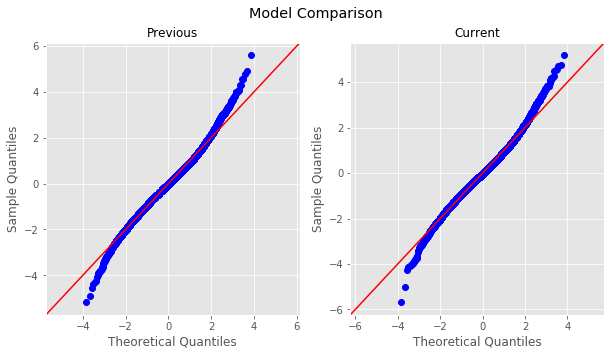

In [65]:
scjpnregression.mfrs_comparison(
    models=[prev_model, model]
    , mfrs=[prev_model_fit_results, model_fit_results]
    , scores_dict={
        'method': scjpnregression.rmse_train_and_rmse_test
        , 'scores': [(prev_train_score, prev_test_score), (train_score, test_score)]
    }
)

We see that our $R^2$ has dropped by almost 0.020.  That's a bit too much for my liking but let's examine how we fared otherwise.

This new $R^2$ is still very respectable.

**The difference between $R^2$ and Adjusted $R^2$ has shrunk**.  This makes sense since we removed another colinear feature.

**$\Delta RMSE$ has improved** again but by a miniscule amount.

Also, ***Condition Number* improved** again, for an even further mitigation of multicolinearity.

I would say that the distribution of residuals has gotten a bit more erratic.  The qq-plot is less smooth than the former.

<br><br>
#### Conclusion:
I would say we have sacrificed some predictive power when compared to the last model.  The drop in nominal improvements in $\Delta$ ($R^2 -$ Adj. $R^2$) and $\Delta RMSE$ are not enough of a justification for the drop in $R^2$ as well as a more erratic distribution of residuals produced by dropping the **sqft_above** feature.

Therefore, we cannot reject $H_0$.  

So we will remove **sqft_above** from theorized_drop_feats since we know the current feature minus the features in theorized_drop_feats produces the "best" model so far.  

Unless we can prove otherwise, we will later commit to selecting the difference between the two as the feature set to be used in the final model.

<br><br>
#### What can we do to improve its performance?
Not much.

To conclude, we will run the `cv_selection_dp` routine on the data set just before testing our theorized features to drop.  That is, we will rely on combinatorics and the dynamic programming (greedy) algorithm encapsulated therein to mathematically, exhaustively determine whether or not there is a more optimal choice of features.

This will result in a total combination space size produced from 17 candidate features - we will be *forward* selecting from a large space of possible feature combinations: $2^{17} - 1 = 131071$ total combinations!  But, the algorithm is smart in that, since it is forward-selecting features using dynamic programming, it skips feature-combinations occurring later that do not include optimal feature-combinations included earlier.

See the *Submit candidate feature-basis to Cross-Validation Forward Selection* section below for details.

In [66]:
preferred_model = prev_model
preferred_train_score = prev_train_score
preferred_test_score = prev_test_score
preferred_mfr = prev_model_fit_results

In [67]:
candidate_features = continuous_features + categorical_features
#candidate_features.remove('condition')
print("candidate feature set (size=={} features) to be submitted to cv_selection_dp(): {}".format(len(candidate_features), candidate_features))
if len(candidate_features) < len(preferred_model.exog_names[1:]):
    print("\ncandidate feature set has the following FEWER features (than preferred model): {}".format(scjpnutils.list_difference(preferred_model.exog_names[1:], candidate_features)))
elif len(candidate_features) > len(preferred_model.exog_names[1:]):
    print("\ncandidate feature set has the following ADDITIONAL features (to preferred model): {}".format(scjpnutils.list_difference(candidate_features, preferred_model.exog_names[1:])))
else:
    print("\ncandidate feature set has the same features (as preferred model)")
kc_house_candidate_cv_selection_data_df = kchd_transformed_and_scaled_df[['id', 'date', target] + candidate_features]
fname = 'kc_house_candidate_cv_selection_data.csv'
kc_house_candidate_cv_selection_data_df.set_index('id').to_csv(fname, sep=',')
print("\nupdated {}; candidate feature set is ready to be submitted for optimized feature selection via cv_selection_dp()...".format(fname))

candidate feature set (size==17 features) to be submitted to cv_selection_dp(): ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'view']

candidate feature set has the following ADDITIONAL features (to preferred model): ['sqft_living', 'condition', 'sqft_living15', 'sqft_lot15']

updated kc_house_candidate_cv_selection_data.csv; candidate feature set is ready to be submitted for optimized feature selection via cv_selection_dp()...


<br><br>
### Submit candidate feature-basis to Cross-Validation Forward Selection

So, the fun begins.

For details on how this is done, please refer to the [Cross-Validation Forward Selection of Features](Appendix.ipynb) section in the appendix.

In [68]:
fname_kc_cv_sel_optimized_features_scores_df = 'kc_cv_sel_optimized_features_scores_df.csv'
while not Path(fname_kc_cv_sel_optimized_features_scores_df).is_file():
    scjpnutils.yes_no_prompt("<a href='CrossValFeatureSelection.ipynb' target='_blank'>Cross-Validation Forward Selection of Features</a> has not yet been run.  Please <a href='CrossValFeatureSelection.ipynb' target='_blank'>Open</a> and run it now, then Press ENTER AFTER it completes.")

To see the results again, just open the [Cross-Validation Forward Selection of Features RESULT](CrossValFeatureSelection-dp.ipynb) notebook.

Note that **if you do re-run the [Cross-Validation Forward Selection of Features](CrossValFeatureSelection-dp.ipynb) notebook, you will have to re-run THIS notebook in order to use those results** (starting from the *next code-cell*).

<br><brb>

### Import Cross-Validation Forward Selection Results and adjust final feature set for Final Preliminary Linear Regression Model

In [69]:
kc_cv_sel_optimized_features_scores_df = pd.read_csv('kc_cv_sel_optimized_features_scores_df.csv')
scjpnutils.print_df(kc_cv_sel_optimized_features_scores_df)

Since `cv_selection_dp` has completed its optimized *forward* feature selection - based on maximized $R^2$ and adjusted $R^2$, as well as minimized $RMSE$ and $\Delta RMSE$ - let's see if it found a better model from those results (than our current preferred model)...

Let's start with models that yielded a better (lower) $\Delta RMSE$ which are "more" predictive based on a tighter "hugging" of residuals alone.

In [70]:
kc_optimized_models__less_delta_rmse = kc_cv_sel_optimized_features_scores_df[kc_cv_sel_optimized_features_scores_df['delta_rmse'] < abs(preferred_train_score - preferred_test_score)]
scjpnutils.print_df(kc_optimized_models__less_delta_rmse)

NONE FOUND!  So far, so good.  Remember, the intent here is to prove that preferred model is best.

How about models which are supposedly "less" colinear (lower *Condition No.*)?

In [71]:
kc_optimized_models__less_colinear = kc_cv_sel_optimized_features_scores_df[kc_cv_sel_optimized_features_scores_df['condition_no'] < preferred_mfr.condition_number]
scjpnutils.print_df(kc_optimized_models__less_colinear)

There are many!  But the interesting thing to note here is that there are no models with more than 10 features total with "less" colinearity.  Let's state this a different way: every single one of the models above feature LESS colinearity than our preferred model and they all do it with fewer features (and that's a GREAT thing!).

Let us now simply choose the model featuring the highest $R^2$ and see how it compares to our current preferred model (which was built using 13 features).

In [72]:
kc_optimized_models__highest_rsquared_from_less_colinear = kc_optimized_models__less_colinear[kc_optimized_models__less_colinear['rsquared'] == kc_optimized_models__less_colinear['rsquared'].max()]
scjpnutils.print_df(kc_optimized_models__highest_rsquared_from_less_colinear)

Let's build a model based on the above 10 features and compared it to our current preferred model.

<br><br>
### Preliminary Regression Model v 5.0, based on cv_selected most predictive features that are less colinear than preferred model:

The hypotheses are as follows:
<br><br>
$H_0$: There is no linear relationship between *log-transformed* target, **price** vs. cv_selected most predictive features that are less colinear than preferred model OR the model is less reliably predictive (increased $\Delta RMSE$ OR increased multicolinearity/Condtion No.).
<br><br>
$H_a$: Some linear relationship exists between *log-transformed* target, **price** vs. cv_selected most predictive features that are less colinear than preferred model AND the model is not less reliably predictive (non-decreased $\Delta RMSE$ and non-decreased multicolinearity/Condtion No.).

current preferred feature set: ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'waterfront', 'view']

less colinear features which produce the most predictive model (according cv_selection): ['bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'yr_built', 'lat', 'sqft_living15', 'waterfront', 'view']



formula: price~bathrooms+sqft_living+floors+condition+grade+yr_built+lat+sqft_living15+waterfront+view


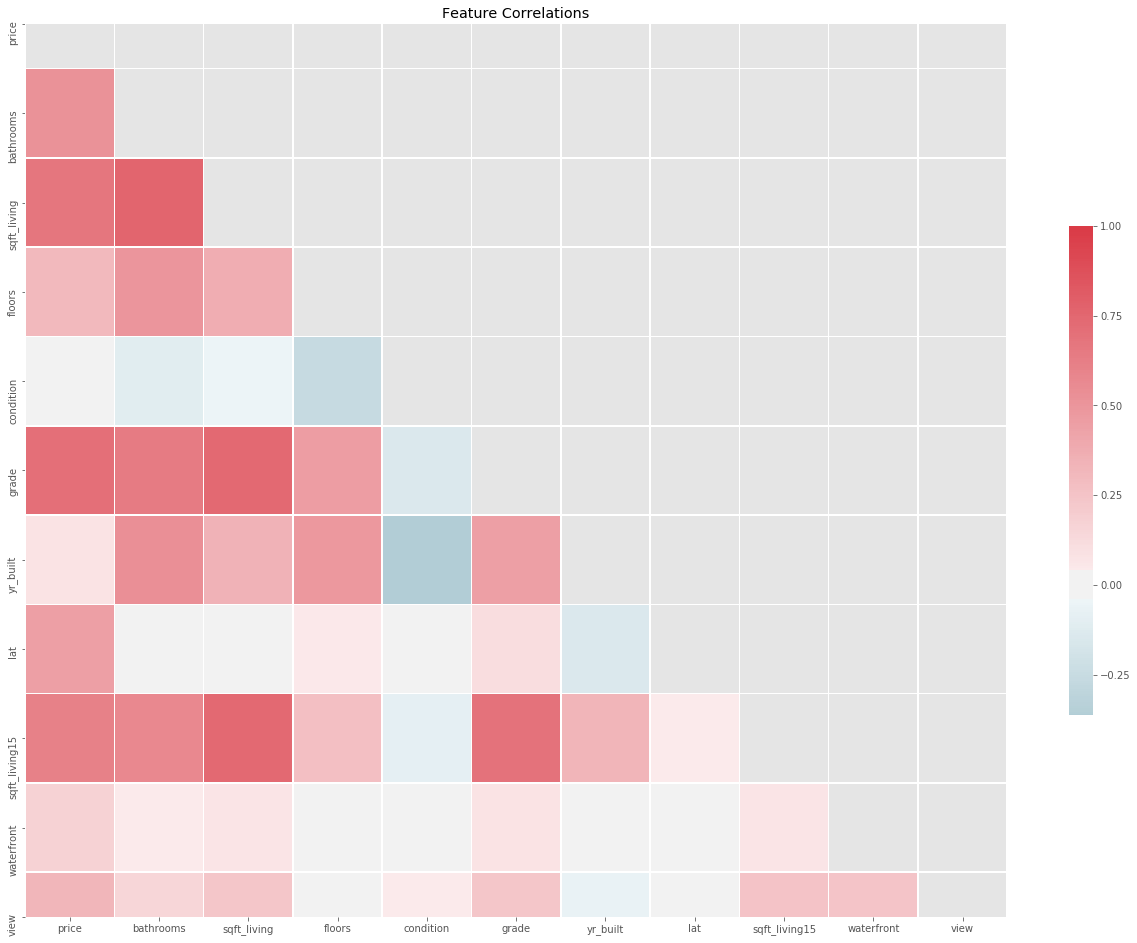

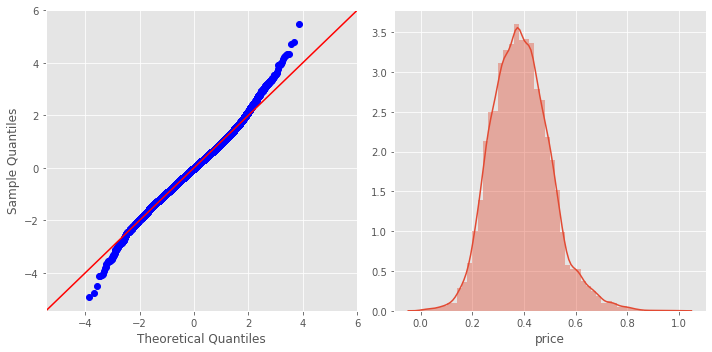

In [73]:
print("current preferred feature set: {}".format(preferred_model.exog_names[1:]))

import ast
compare_cv_selected_features = ast.literal_eval(kc_optimized_models__highest_rsquared_from_less_colinear['features'].values[0])
print("\nless colinear features which produce the most predictive model (according cv_selection): {}".format(compare_cv_selected_features))

(
    sel_features
    , X_train
    , X_test
    , y_train
    , y_test
    , train_score
    , test_score
    , model
) = scjpnregression.lin_reg_model(
    kchd_transformed_and_scaled_df.drop(['id', 'date'], axis=1)[[target] + compare_cv_selected_features]
    , target
    , title="Preliminary Regression Model v 5.0, based on cv_selected most predictive features that are less colinear than preferred model:"
)

(model_fit_results, good_vif_features, bad_vif_features) = scjpnregression.model_fit_summary(
    kchd_transformed_and_scaled_df.drop(['id', 'date'], axis=1)[[target] + compare_cv_selected_features]
    , sel_features
    , target
    , model
    , train_score
    , test_score
    , mv_r_sq_th
    , mv_delta_score_th
    , mv_bad_vif_ratio_th
)

<br><br>
### Preliminary Regression Model v 5.0, based on cv_selected most predictive features that are less colinear than preferred model: ANALYSIS

#### Is this model better than our current preferred model?

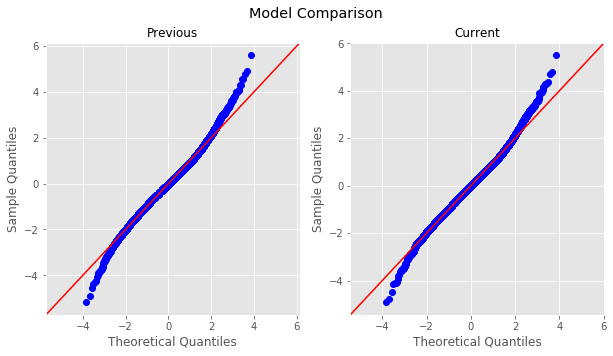

In [74]:
scjpnregression.mfrs_comparison(
    models=[preferred_model, model]
    , mfrs=[preferred_mfr, model_fit_results]
    , scores_dict={
        'method': scjpnregression.rmse_train_and_rmse_test
        , 'scores': [(preferred_train_score, preferred_test_score), (train_score, test_score)]
    }
)

This model is better in almost every respect.

This model features an even better $R^2$ and it does so with fewer features!

The difference between $R^2$ and Adjusted $R^2$ has also improved; i.e. even though it is by a very small amount, <i>relatively speaking</i>, the former preferred model is "overfit".

This new model based on fewer features also offers less colinearity - again, that's a good thing.

The only statistic in which it suffers is a MINISCULE increase in $\Delta RMSE$.  Since it is an increase it is not ideal but the $\Delta RMSE$ is still phenomenally low.

Perhaps what is not apparent by the above statistics alone is the improvement in the distribution of residuals.

The qq-plot is just about as smooth as the one from the previously preferred model (based on 13 features) but appears to offer a slightly tigher "hugging" - note that the tails pull away less than the tails in the qq plot of the previously preferred model.

Is the slight drop in$\Delta RMSE$ worth the improvements?

I would say so, definitely.

#### Conclusion:

We can confidently reject $H_0$ and accept $H_a$, thereby adopting this as our preferred and final model.

<br><br>
### Final Linear Regression Model: adopt model based on cv_selected most predictive features that are less colinear than preferred model

In [75]:
final_model = model
final_train_score = train_score
final_test_score = test_score
final_mfr = model_fit_results

lt_cont_feats = scjpnutils.list_remove_difference(lt_cont_feats, compare_cv_selected_features)
nonlt_cont_feats = scjpnutils.list_remove_difference(nonlt_cont_feats, compare_cv_selected_features)
normalized_feats = scjpnutils.list_remove_difference(normalized_feats, compare_cv_selected_features)
continuous_features = scjpnutils.list_remove_difference(continuous_features, compare_cv_selected_features)
categorical_features = scjpnutils.list_remove_difference(categorical_features, compare_cv_selected_features)

## Characteristics of Final Linear Regression Model which BEST predicts price

In [76]:
s_html = "To summarize the final model which BEST predicts our target, <b>price</b>, has the following characteristics:<ol>"
s_html += "<li>All features have been selected via <i>5 k-fold cross-validation</i> to best predict <b>price</b>.</li>"
s_html += "<li>The target, <b>price</b>, has been <i>log-transformed</i> and <i>min-max scaled</i>.</li>"
if len(continuous_features) > 0:
    s_html += "<li><i>Continuous</i> features (optimized selection via Cross-Validation over 5 k-folds):<ol>"
    for cont_feat in continuous_features:
        s_html += "<li><b>{}</b> ({}<i>log-transformed</i>{})</li>".format(
            cont_feat
            , "NOT " if cont_feat not in lt_cont_feats else ""
            , ", <i>min-max scaled</i>" if cont_feat in normalized_feats else ""
        )
    s_html += "</ol></li>"
if len(categorical_features) > 0:
    s_html += "<li><i>Categorical</i> features (optimized selection via Cross-Validation over 5 k-folds):<ol>"
    for categorical_feature in categorical_features:
        s_html += "<li><b>{}</b></li>".format(categorical_feature)
    s_html += "</ol></li>"
s_html += "<li>$R^2={}$</li>".format(model_fit_results.rsquared)
s_html += "<li>Adjusted $R^2={}$</li>".format(model_fit_results.rsquared_adj)
s_html += "<li>Condition No. $={}$ ($<<1000 \\implies$ NO SUBSTANTIAL MULTICOLINEARITY!)</li>".format(model_fit_results.condition_number)
s_html += "<li>$\\Delta RMSE={}$</li>".format(abs(test_score - train_score))
display(HTML(s_html))

<br><br>
### Wrapping up: Comparison of very first model to the Final Linear Regression Model

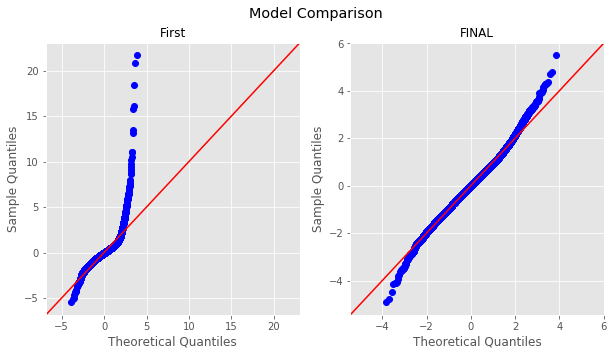

In [77]:
scjpnregression.mfrs_comparison(
    models=[first_model, final_model]
    , mfrs=[first_mfr, final_mfr]
    , scores_dict={
        'method': scjpnregression.rmse_train_and_rmse_test
        , 'scores': [(first_train_score, first_test_score), (final_train_score, final_test_score)]
    }
    , titles=["First", "FINAL"]
)

## Conclusion
So there you have it.  From the initial set of features - 18 of them - the set which most accurately and reliably predicts sale price of a home in King's County is:

1. **bathrooms**
2. **sqft_living**
3. **floors**
4. **condition**
5. **grade**
6. **yr_built**
7. **lat**
8. **sqft_living15**
9. **waterfront**
10. **view**

## Step 5: Run linear regression experiments to answer real questions

### Question 1: *From the above list, which features that have the most impact could FEASIBLY be addressed by the seller to increase the sale price of his/her home?*

Let's first plot the bar chart showing the relative importance of each standardized feature used in the model.

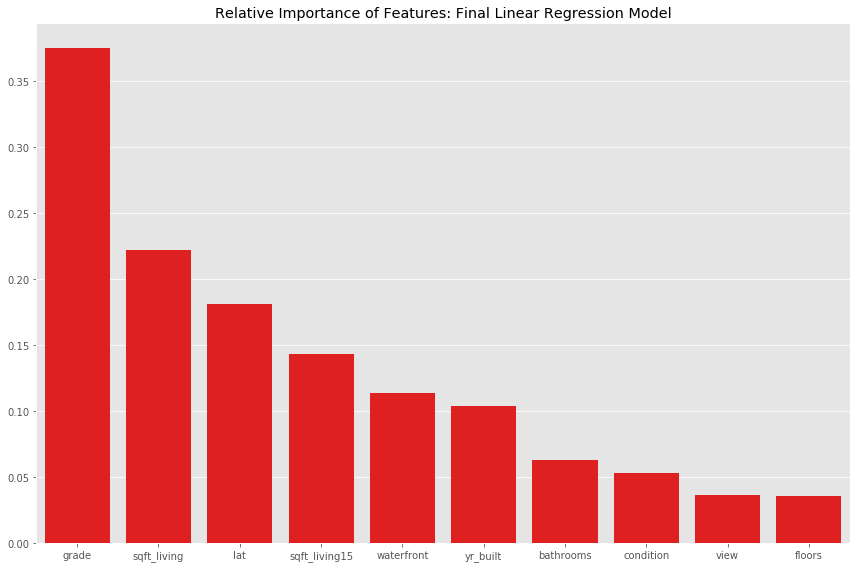

In [78]:
scjpnregression.plot_feature_importance(model_fit_results, 'Final Linear Regression Model');

Thus, the model tells us that the importance that features have in determining the sale price of a home in King County are ordered as follows:
1. **grade**
2. **sqft_living**
3. **lat**
4. **sqft_living15**
5. **waterfront**
6. **yr_built**
7. **bathrooms**
8. **condition**
9. **view**
10. **floors**


#### But which of those features can a seller <i>feasibly</i> address?
Let's first exclude those features about which the seller can do nothing:
1. **lat**: the seller can not uproot his home and relocate it - we assume these are not mobile homes.
2. According to the definitions provided, **sqft_living15** is the square footage of <u>surrounding</u> homes; although its value certainly does influence the sale price of a given home, since it refers to a measure of homes different than the seller's, he can do nothing to change it.
3. **waterfront**: the seller cannot install a river or lake next to his home.
4. **yr_built**: the seller cannot go back in time and change the date of when his house was first built.

<b>The remaining list of features are those that the seller can feasibly address to increase the sale price of his home, in order of importance in determining the sale price of a home in King County</b>:
1. **grade**: since **grade** far outweighs other features in importance, the best strategy should be centered around getting the County Assessor to reassess the seller's home with a higher grade (than the grade originally assessed).  But what basis would justify reassessment at a higher grade? The next most important feature seems to be inline with reason.
2. **sqft_living**: livable square footage comes next in terms of importance in sale price of a home; therefore, the strategy should involve renovating the home to increase LIVEABLE square footage.
3. **bathrooms**: bathrooms apparently form a special sub-category of liveable square footage that suggest that bathroom square footage is of the premium variety of liveable square footage.
4. **condition**: it seems reasonable that renovating a home by virtue of adding liveable square footage (other than bathroom), as well as bathroom square footage should improve the condition of the home, and thereby improve the condition.  But this is of course dependent on the Assessor and is probably correlated somewhat to **grade**.
5. **view**: having the home viewed AFTER renovation and officially having it listed as viewed in the MLS apparently makes a difference in perceived value.  But this should be done after renovation is complete.
6. **floors**: of course adding another floor to the seller's home should increase its value.  But is this feasible?  It is a large undertaking and could be treated almost equivalently to simply building another home separately.  Therefore, given the cost and effort involved to add an entire floor, the suggestion is to avoid this.  Also, adding another floor has less impact than the above.

### Final list of features that can be directly or indirectly addressed by the seller to increase sale price
1. **sqft_living**
2. **bathrooms**
3. **condition**
4. **grade**
5. **view**

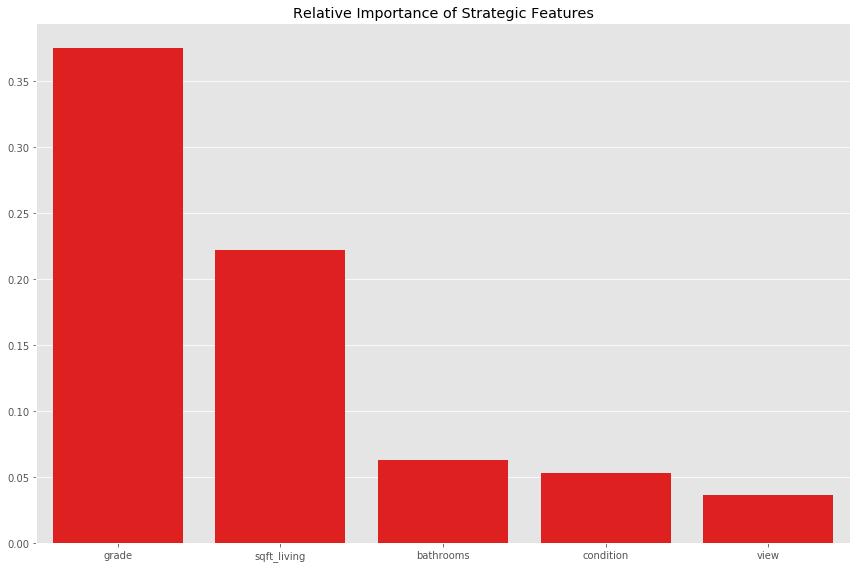

In [79]:
infeasible_features = ['lat', 'sqft_living15', 'waterfront', 'yr_built', 'floors']
features_in_model = np.absolute(model_fit_results.params[1:]).sort_values(ascending=False)
feat_names_in_model = list(features_in_model.index)
strategic_feat_names = []
strategic_feat_values = []
for idx, feat in enumerate(feat_names_in_model):
    if feat not in infeasible_features:
        strategic_feat_names.append(feat)
        strategic_feat_values.append(features_in_model.values[idx])

import seaborn as sns
fig = plt.figure(figsize=(12, 8))
plt.title("Relative Importance of Strategic Features")
sns.barplot(x=strategic_feat_names, y=strategic_feat_values, color='red')
fig.tight_layout()
plt.show();

### SUGGESTED STRATEGY based on relative importance of features that can be feasibly addressed by the seller
1. Renovate the home by adding LIVEABLE square footage - note that the model suggests that some of that added liveable square footage should be in the form of new bathroom square footage. This will increase:
    1. **sqft_living**
    2. bathrooms
2. Request County Reassessment, which, in theory, should result in an increase in:
    1. condition
    2. **grade**
3. Officially relist the home for sale in the MLS with the upgraded condition and/or grade, which will eventually result in setting the view flag.

<br><br>
### Experiment: Given a hypothetical set of values for the 10 features upon which the model is based, compute the predicted increase in sale price by "enhancement" of the above <u>strategic</u> features.

First, consider the following rules:

In [80]:
s_html = "<ol>"
if len(feat_names_in_model) > 0:
    s_html += "<li>Hypothetical feature value tranformations required and allowable values:<ol>"
    for feat in feat_names_in_model:
        if feat in orig_continuous_features:
            s_html += "<li><b>{}</b>: must {} <i>log-transformed</i>{}</li>".format(
                feat
                , "NOT be" if feat not in orig_lt_cont_feats else "be"
                , ", must be <i>min-max scaled</i>" if feat in orig_normalized_feats else ""
            )
        else: # then it had better be categorical
            allowable_values = "allowable values are {}".format(kchd_cleaned_df[feat].unique())
            s_html += "<li><b>{}</b>: <i>categorical</i>; {}</li>".format(
                feat
                , allowable_values
            )
    s_html += "</ol></li>"
s_html += "</ol>"
display(HTML(s_html))

Suppose a hypothetical seller wants to sell his house with the following "initial conditions":

1. **grade** := 4
2. **sqft_living** := 2357 $ft.^2$
3. lat: <<i>since this is a hypothetical scenario, we just assign the average</i>>
4. sqft_living15 := 2400
5. waterfront := 0
6. yr_built := 1968
7. **bathrooms** := 2.5
8. **condition** := 3
9. **view** := 0
10. floors := 1

Note that strategic features (those that can be either directly or indirectly "enhanced" by the seller) are listed in **bold** above.  **The experiment involves manipulating those values**.  

**The non-bolded (non-strategic feature) values will remain fixed** for the experiment.

In [81]:
data = [
    {
        'grade': 4
        , 'sqft_living': 2357
        , 'lat': (kchd_cleaned_df['lat'].min()+kchd_cleaned_df['lat'].max())/2 # try 'lat': 48 to see a big jump in predicted price
        , 'sqft_living15': 2400
        , 'waterfront': 0
        , 'yr_built': 1968
        , 'bathrooms': 2.5
        , 'condition': 3
        , 'view': 0
        , 'floors': 1
        
    }
]

predictors_df = pd.DataFrame(data, columns=feat_names_in_model)

<br><br>
#### Question 1: What will be the market value of his/her home according to the above predictor values?

In [82]:
def transform(df):
    df_copy = df.copy()
    feats_to_log_transform = []
    feats_to_min_max_scale = []
    feats_categorical = []
    
    for col in df.columns:
        if col in orig_continuous_features:
            if col in orig_lt_cont_feats:
                feats_to_log_transform.append(col)
            if col in orig_normalized_feats:
                feats_to_min_max_scale.append(col)
                
        if col in orig_categorical_features:
            feats_categorical.append(col)
            
    for feat_to_log_transform in feats_to_log_transform:
        scjpnutils.clean_offending_values(
            df_copy
            , numeric_replacement_rules={feat_to_log_transform: [(0.0, 1)]}
            , verbose=False
        )
        
    for feat_categorical in feats_categorical:
        df_copy[feat_categorical] = df_copy[feat_categorical].astype(kchd_cleaned_df[feat_categorical].dtype)
    
    # log-transform
    transformed_df = scjpnutils.log_transform(df_copy, feats_to_log_transform)
    
    # min-max scale
    for feat in feats_to_min_max_scale:
        min_feat = np.log(kchd_cleaned_df[feat]).min() if feat in feats_to_log_transform else kchd_cleaned_df[feat].min()
        max_feat = np.log(kchd_cleaned_df[feat]).max() if feat in feats_to_log_transform else kchd_cleaned_df[feat].max()
        transformed_df[feat] = transformed_df[feat].map(lambda x: (x-min_feat)/(max_feat-min_feat))

    return transformed_df

# assumes predictors_df is not transformed or scaled!
def predict(predictors_df, verbose=True):
    if verbose:
        display(HTML("<h4>Unscaled/transformed Predictors:</h4>"))
        scjpnutils.print_df(predictors_df)
    transformed_predictors_df = transform(predictors_df)
    if verbose:
        display(HTML("<h4>Predictors after Scaling/Transformation:</h4>"))
        scjpnutils.print_df(transformed_predictors_df)
    
    # log-transformed and scaled target series:
    predicted_lt_and_scaled_target_series = model_fit_results.predict(transformed_predictors_df)
    
    # now we need to unscale and transform to e^lt_target
    #    but first we need a temp df including the transformed and scaled df target with predicted_target_series appended to it
    scaled_and_transformed_predicted_target_df = pd.DataFrame()
    scaled_and_transformed_predicted_target_df = pd.concat(
        [scaled_and_transformed_predicted_target_df, predicted_lt_and_scaled_target_series]
        , ignore_index=True
        , sort=False
    )
    scaled_and_transformed_predicted_target_df.columns = [target]
    if verbose:
        display(HTML("<h4><b>$\\widehat{" + target + "}$</b> (scaled/transformed):</h4>"))
        scjpnutils.print_df_tail(scaled_and_transformed_predicted_target_df, len(predictors_df))
    
    #    now undo df[target].map(lambda x: (x-min_feat)/(max_feat-min_feat)) but we need to do the from the original
    transformed_train_target_df = pd.concat(
        [kchd_cleaned_df[[target]]]
        , ignore_index=True
        , sort=False
    )  
    transformed_train_target_df[target] = np.log(transformed_train_target_df[target])
    min_transformed_train_target = transformed_train_target_df[target].min()
    max_transformed_train_target = transformed_train_target_df[target].max()
    
    #    step 1: unscale target: multiply scaled target by (unscaled_max_train_target-unscaled_min_train_target) and then add unscaled_min_train_target
    scaled_and_transformed_predicted_target_df[target] = scaled_and_transformed_predicted_target_df[target].map(
        lambda scaled_predicted_target: ((max_transformed_train_target-min_transformed_train_target)*scaled_predicted_target)+min_transformed_train_target
    )
    unscaled_but_still_transformed_predicted_target_df = scaled_and_transformed_predicted_target_df
    if verbose:
        display(HTML("<h4>Unscaled (but still transformed) <b>$\\widehat{" + target + "}$</b>:</h4>"))
        scjpnutils.print_df(unscaled_but_still_transformed_predicted_target_df)
    
    #.   step 2: log-transformation is really the natural log, so we now need to map to e to the power of the above
    unscaled_but_still_transformed_predicted_target_df[target] = unscaled_but_still_transformed_predicted_target_df[target].map(
        lambda unscaled_but_still_transformed_predicted_target: np.e**unscaled_but_still_transformed_predicted_target
    )
    unscaled_and_not_transformed_predicted_target_df = unscaled_but_still_transformed_predicted_target_df
    if verbose:
        display(HTML("<h4>Final: unscaled, not transformed <b>$\\widehat{" + target + "}$</b>:</h4>"))
        scjpnutils.print_df(unscaled_and_not_transformed_predicted_target_df)
    
    return unscaled_and_not_transformed_predicted_target_df

In [83]:
predicted_target_df = predict(predictors_df)
display(HTML("<h4>Predicted <i>{}</i>, with associated predictors:</h4>".format(target)))
predicted_target_df = pd.concat([predicted_target_df, predictors_df], axis=1, join='inner')
scjpnutils.print_df(predicted_target_df)

<br><br>
#### Question 2: Suppose the seller wants to get a higher price?  What is his best course of action?

Let's observe how/if **price** increases based on incrementally "enhancing" the identified strategic features.

Let's start with renovating the home via new liveable square-footage construction - e.g. adding new bedroom.  The effect will be to increase **sqft_living**.

##### Question 2.a: By how much can the seller increase the market value of the home if he has another livable room added to his home, say, for example, a modest 10 ft. x 10 ft. (100 $ft.^2$) bedroom?

In [84]:
data.append(data[0].copy())
data[1]['sqft_living'] += 100

predictors_df = pd.DataFrame(data, columns=feat_names_in_model)
predicted_target_df = predict(predictors_df)
display(HTML("<h4>Predicted <i>{}</i>, with associated predictors:</h4>".format(target)))
predicted_target_df = pd.concat([predicted_target_df, predictors_df], axis=1, join='inner')
scjpnutils.print_df(predicted_target_df)

In [85]:
delta_price = predicted_target_df.iloc[1]['price'] - predicted_target_df.iloc[0]['price']
display(HTML("<h4>Thus, by adding an additional $100 ft.^2$ bedroom, the model predicts the sale price of his home will increase by: ${} dollars.</h4>".format(round(delta_price, 2))))

That's actually not much, is it?  Considering how much it costs to pay a contractor to build this add-on, the seller will likely be in the red.  So far, simply adding an extra $100 ft.^2$ of liveable square footage doesn't seem worth the trouble.

BUT, suppose that the contractor offers the seller the deal of his lifetime to only charge for *his* cost of building materials provided the seller commits to at least 200 sq. ft. of construction, at the contractor's usual cost of 100 dollars per sq. ft. (with a 100 sq. ft. minimum).

That is, if the seller commits to a minimum of 200 sq. ft., for a minimum of 20,000 dollars, the contractor will only charge for the *contractor-cost* of the building materials after that.

Let's suppose for all intents and purposes, building materials *cost the contractor* roughly $20 per square foot.  This will include the basics only, such as structural materials - i.e. wood, nails, etc. - as well as drywall and of course eletrical materials to wire the new room.  Like I said, it's the deal of a lifetime for the seller.

Finally, let's impose the constraint that the seller has a cut-off budget of $40,000 to invest in this deal.

<br><br>
#### Question 2.b.: Can this be accomplished within the seller's budget and, if so, how much will the seller have to invest in order to break even (based on the predicted market value of the renovated home) if he takes advantage of this deal?

In [86]:
def evaluate_renovation(
    minimum_sqft_req_by_contractor
    , base_cost_of_deal_offered_by_contractor
    , cost_of_materials_per_sq_ft
    , seller_budget
    , bathrooms_added=0):

    edge = np.sqrt(minimum_sqft_req_by_contractor)
    sqft_added = edge**2
    d_sq_ft_beyond_min = sqft_added - minimum_sqft_req_by_contractor
    cost_for_sq_ft_beyond_min = d_sq_ft_beyond_min*cost_of_materials_per_sq_ft
    investment = base_cost_of_deal_offered_by_contractor + cost_for_sq_ft_beyond_min

    delta_price = 0 # since construction has not yet begun
    
    g = ([], [])

    while delta_price < investment and investment < seller_budget:
        sqft_added = edge**2
        d_sq_ft_beyond_min = sqft_added - minimum_sqft_req_by_contractor
        cost_for_sq_ft_beyond_min = d_sq_ft_beyond_min*cost_of_materials_per_sq_ft
        investment = base_cost_of_deal_offered_by_contractor + cost_for_sq_ft_beyond_min

        data[1]['sqft_living'] = data[0]['sqft_living'] + sqft_added
        data[1]['bathrooms'] = data[0]['bathrooms'] + bathrooms_added

        predictors_df = pd.DataFrame(data, columns=feat_names_in_model)

        predicted_target_df = predict(predictors_df, verbose=False)
        predicted_target_df = pd.concat([predicted_target_df, predictors_df], axis=1)
        delta_price = predicted_target_df.iloc[1]['price'] - predicted_target_df.iloc[0]['price']
        
        g[0].append(delta_price - investment)
        g[1].append(sqft_added)
            
        edge += 1

    fig = plt.figure(figsize=(12, 8))
    plt.ylabel("investment $- \\Delta$ sale price")
    plt.xlabel("sqft. added")
    sns.scatterplot(x=g[1], y=g[0], color='red')
    plt.axhline(y=0, c='green', linestyle='dashed', zorder=-1)
    labels = ["break even", "(investment $- \\Delta$ sale price) vs. sqft. added"]
    plt.legend(labels)
    fig.tight_layout()
    plt.show();
    
    display(HTML("<h4>Predicted <i>{}</i>, with associated predictors:</h4>".format(target)))
    scjpnutils.print_df(predicted_target_df)
    display(HTML("{} $ft.^2$ added".format(round(sqft_added, 2))))
    display(HTML("yields $\Delta$ sale price of home: ${}".format(round(delta_price, 2))))
    display(HTML("requires ${} investment".format(round(investment, 2))))
    display(HTML("profit = ${}".format(round(delta_price - investment, 2))))
    
    if investment > seller_budget:
        display(HTML("<h4>Sorry!  The investment required to break even based on the predicted price is either infinite or has exceeded the seller's budget ($\${}$) limit threshold!</h4>".format(round(seller_budget, 2))))

    return (sqft_added, delta_price, investment, g)

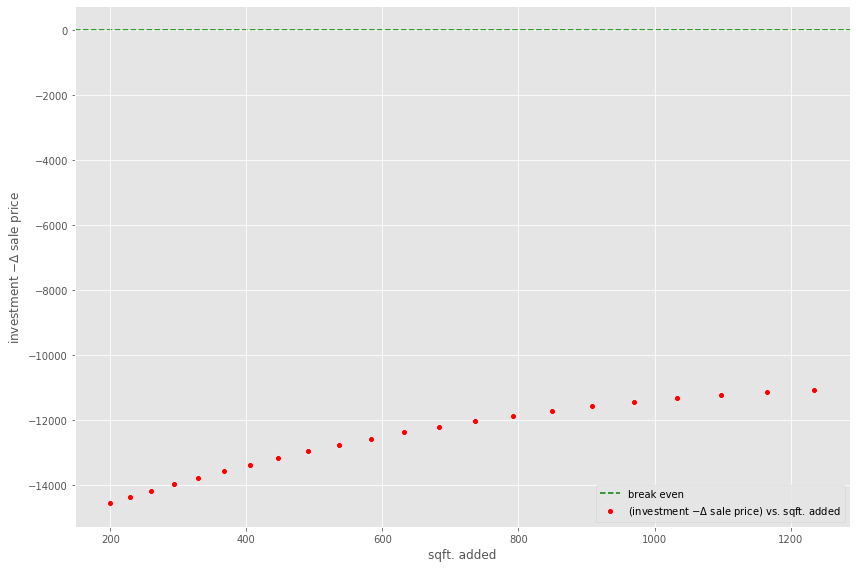

In [87]:
minimum_sqft_req_by_contractor = 200
base_cost_of_deal_offered_by_contractor = 20000
cost_of_materials_per_sq_ft = 20
seller_budget = 40000

(sqft_added, delta_price, investment, g) = evaluate_renovation(
    minimum_sqft_req_by_contractor
    , base_cost_of_deal_offered_by_contractor
    , cost_of_materials_per_sq_ft
    , seller_budget
)

We see that the seller's budget of \\$40,000 was exceeded after adding about 1200 $ft.^2$ and only netted a profit in sale price of \\$29,622.90 for a TOTAL profit after investing \\$40,699.39 in the red at <font color="red">\\$-11076.5</font>.

It's not looking like a wise investment so far at the outset.

<br><br>
But what if the seller simply dumped more more money into adding more liveable square footage?  Will it ever be possible to break even or net an overall profit? (HINT: we will see that it will matter whether or not some of that square footage is a bathroom or not.)

Let's try the model again with a budget of \\$100,000 just to see...

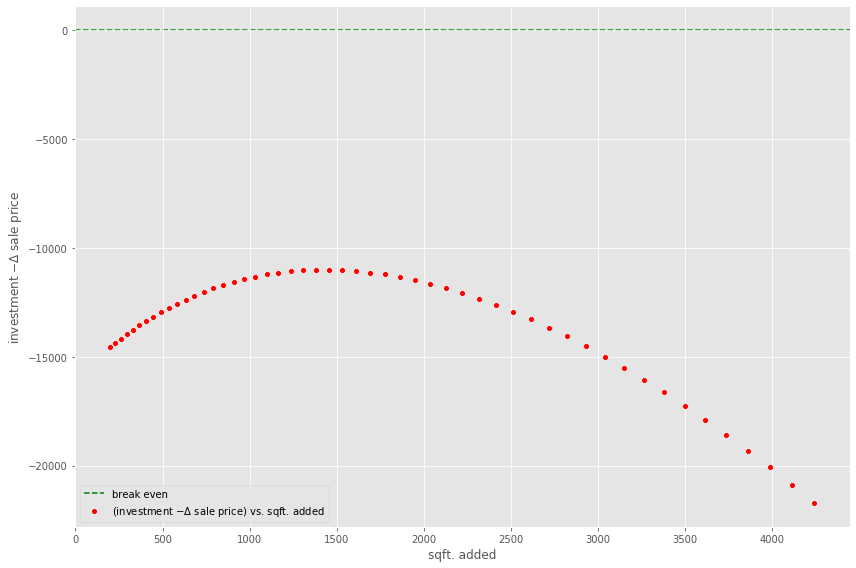

In [88]:
(sqft_added, delta_price, investment, g) = evaluate_renovation(
    minimum_sqft_req_by_contractor
    , base_cost_of_deal_offered_by_contractor
    , cost_of_materials_per_sq_ft
    , 100000
)

YIKES!  NOPE!  It is definitely not possible.

In fact, it begins to cost the seller more and more to yield less and less difference in sale price.

By the way, the point of "no return", after which the seller's loss will forever increase, is when sqft. added is:

In [89]:
g[1][g[0].index(max(g[0]))]

1454.8225099390856

<b>Any square footage beyond 1454 (without enhancing any other feature) results in losses to the seller that just continue to increase</b>!

Thus, <b>adding liveable square footage (of the non-bathroom variety) <u>and doing nothing more</u> does not look like a wise strategy</b>.

<br><br>
But hold on a minute!  We noted initially that our model suggests that **bathrooms** is a strategic feature.

What if we allocated some of the construction effort for liveable square footage toward bathrooms?

Let's leave the numbers in our problem statement as is but do just that - i.e. require the contractor to build bathrooms out of some of that new square footage to be added.  Why not?  It will require more building materials but does not add any additional square footage per se.

Let's start with converting some of that new square footage to a single bathroom without a shower - i.e. addding **bathrooms** = 0.5.

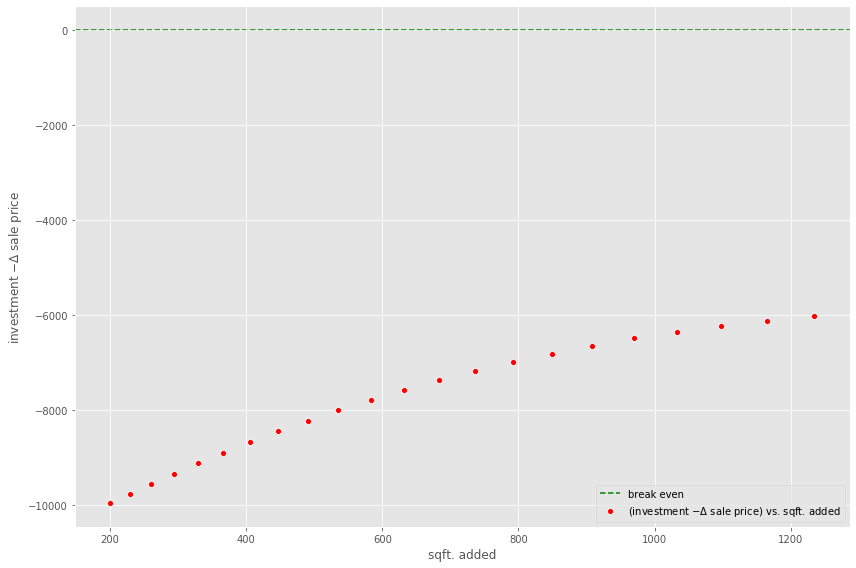

In [90]:
(sqft_added, delta_price, investment, g) = evaluate_renovation(
    minimum_sqft_req_by_contractor
    , base_cost_of_deal_offered_by_contractor
    , cost_of_materials_per_sq_ft
    , seller_budget
    , bathrooms_added=0.5
)

Classifying some of that square footage as a half-bathroom improved the situation by about \\$5000 (the first overall profit was \\$-11076.5)!  This looks promising.

<br><br>
Let's add a shower to that bathroom and see how it turns out.

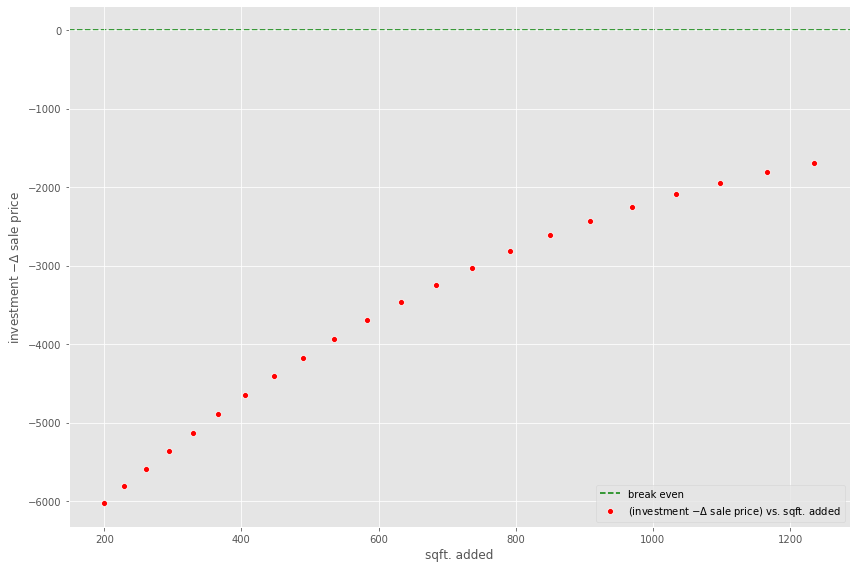

In [91]:
(sqft_added, delta_price, investment, g) = evaluate_renovation(
    minimum_sqft_req_by_contractor
    , base_cost_of_deal_offered_by_contractor
    , cost_of_materials_per_sq_ft
    , seller_budget
    , bathrooms_added=1
)

That still does not break even for the seller.  BUT look at the overall proft!  The seller is only in the red by $-1695.56 and the trend of this curve appears to be approaching the break-even point.

<br><br>
So let's allocate more of that square footage to a new half-bathroom.  So, **bathrooms** = 1.5.

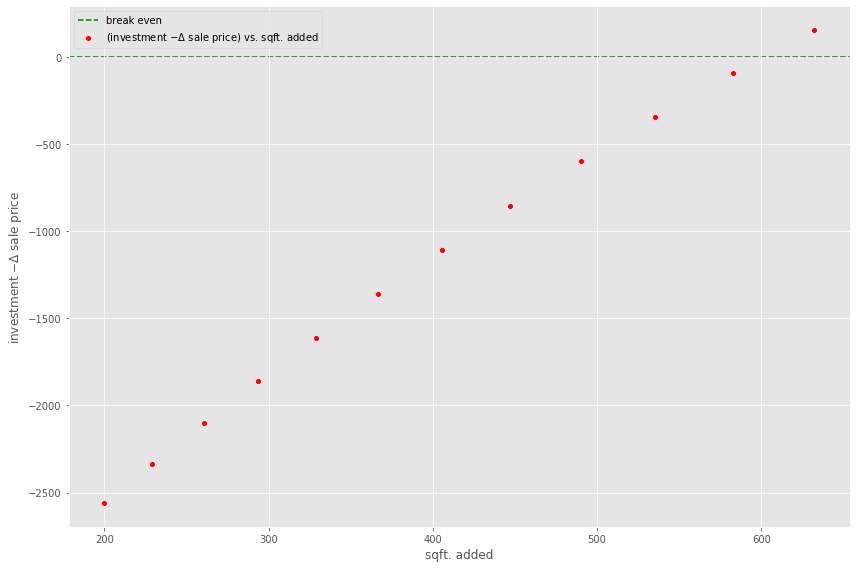

In [92]:
(sqft_added, delta_price, investment, g) = evaluate_renovation(
    minimum_sqft_req_by_contractor
    , base_cost_of_deal_offered_by_contractor
    , cost_of_materials_per_sq_ft
    , seller_budget
    , bathrooms_added=1.5
)

EUREKA!

A \\$28,642.54 investment is well below the seller's budget of \\$40,000 and results in breaking even, with a tiny profit of \\$154.22!  So far, taking the contractor up on his offer to build an add-on constituting an additional 632 $ft.^2$ <i>with some of that LIVEABLE square-footage allocated to a full bathroom plus a half-bathoom</i> looks like a GREAT investment.

Suppose that now the seller asks his realtor to update his listing, which results in his home being **viewed** almost immediately.

<br><br>
#### Question 3: How much will the fact that his home has now been viewed affect the predicted sale price?

First, the seller needs to commit to this construction!

In [93]:
# first, commit to this construction
data[1]['sqft_living'] = data[0]['sqft_living'] + 632.13
data[1]['bathrooms'] = data[0]['bathrooms'] + 1.5

predictors_df = pd.DataFrame(data, columns=feat_names_in_model)
predicted_target_df = predict(predictors_df)
display(HTML("<h4>Predicted <i>{}</i>, with associated predictors:</h4>".format(target)))
predicted_target_df = pd.concat([predicted_target_df, predictors_df], axis=1, join='inner')
scjpnutils.print_df(predicted_target_df)

<br><br>
Now we can run the test to determine how having his renovated home listed as viewed in the MLS affects the predicted sale price:

In [94]:
data.append(data[1].copy())
data[2]['view'] = 1

predictors_df = pd.DataFrame(data, columns=feat_names_in_model)
predicted_target_df = predict(predictors_df, verbose=False)
display(HTML("<h4>Predicted <i>{}</i>, with associated predictors:</h4>".format(target)))
predicted_target_df = pd.concat([predicted_target_df, predictors_df], axis=1, join='inner')
scjpnutils.print_df(predicted_target_df)

delta_price = predicted_target_df.iloc[2]['price'] - predicted_target_df.iloc[1]['price']
delta_sqft = predicted_target_df.iloc[1]['sqft_living'] - predicted_target_df.iloc[0]['sqft_living']
display(HTML("<h4>Thus, subsequently having his home officially <b>viewed</b> (and listed as such) after adding some <i>livable</i> sq. ft. (with some of it reserved for 1.5 new bathrooms), the model predicts the sale price of his home will increase again by {} dollars!</h4>".format(round(delta_price, 2))))
display(HTML("<h4>That's a total <b>profit of {} dollars</b> (AFTER his initial investment of ${})! AMAZING!</h4>".format(round((predicted_target_df.iloc[2]['price'] - predicted_target_df.iloc[0]['price']) - investment, 2), round(investment, 2))))

Finally, after having this work done and having his home listed in the MLS as viewed, the seller requests the King County Assessor to officially reassess his home, with the hope that either the **condition** or the **grade** is upgraded.  Suppose first that this results in an increase in the **condition** of his home from 3 to 4.

<br><br>
#### Question 4: How much will the fact that his home has been officially upgraded from 3 to 4 in <i>condition</i> affect the predicted sale price?

In [95]:
data.append(data[2].copy())
data[3]['condition'] = data[2]['condition'] + 1

predictors_df = pd.DataFrame(data, columns=feat_names_in_model)
predicted_target_df = predict(predictors_df, verbose=False)
display(HTML("<h4>Predicted <i>{}</i>, with associated predictors:</h4>".format(target)))
predicted_target_df = pd.concat([predicted_target_df, predictors_df], axis=1, join='inner')
scjpnutils.print_df(predicted_target_df)

delta_price = predicted_target_df.iloc[3]['price'] - predicted_target_df.iloc[2]['price']
display(HTML("<h4>Thus, the official upgrade in <i>condition</i> from 3 to 4 results in an increase of {} dollars from the last predicted sale price</h4>".format(round(delta_price, 2))))
display(HTML("<h4>That's a total <b>profit of {} dollars</b> (after his initial investment)!!!</h4>".format(round((predicted_target_df.iloc[3]['price'] - predicted_target_df.iloc[0]['price']) - investment, 2))))

Finally, suppose Lady Luck has smiled upon the seller, resulting in the County Assessor also upgrading the value of the **grade** of his home from 4 to 5.

<br><br>
#### Question 5: How much will the fact that his home has been officially upgraded from 4 to 5 in <i>grade</i> affect the predicted sale price?

In [96]:
data.append(data[3].copy())
data[4]['grade'] = data[3]['grade'] + 1

predictors_df = pd.DataFrame(data, columns=feat_names_in_model)
predicted_target_df = predict(predictors_df, verbose=False)
display(HTML("<h4>Predicted <i>{}</i>, with associated predictors:</h4>".format(target)))
predicted_target_df = pd.concat([predicted_target_df, predictors_df], axis=1, join='inner')
scjpnutils.print_df(predicted_target_df)

delta_price = predicted_target_df.iloc[4]['price'] - predicted_target_df.iloc[3]['price']
display(HTML("<h4>Thus, the official upgrade in <i>grade</i> from 4 to 5 results in a virtually <b>UNBELIEVABLE</b> increase of ${} from the last predicted sale price</h4>".format(round(delta_price, 2))))
display(HTML("<h4>That's a TOTAL <b>profit of ${}</b> (after his initial investment)!!!</h4>".format(round((predicted_target_df.iloc[4]['price'] - predicted_target_df.iloc[0]['price']) - investment, 2))))

<p><br><br>
Sit back and absorb that for a second.

It seems unbelievable but that's what the model predicts and we can rely on this prediction, at least stastically speaking.

But, in order to garner that amazing profit, the seller had to do the following, in order:
1. spend an initial investment of \\$28,642.54 to to have his home renovated by adding an additional 632 $ft.^2$ of livable square footage (increase in **sqft_living**)
    1. note that it was absolutely fundamental to his success to have additional **bathrooms** (1.5 to be exact) built 
    2. simply adding non-liveable square-footage or liveable square footage alone without bathrooms would not do the trick
2. make the effort to get the home viewed by potential buyers AFTER the renovation - this may mean additional hidden fees from a realtor since it has the added caveat that the home's **view** flag must be set in the MLS
3. make the effort to get the home reassessed by the King County Assessor - note that there may be additional hidden fees in this effort as well - which will hopefully result in an increased value in **condition** and, MOST IMPORTANTLY, **grade**.

# Future Considerations
Given the amount of detail and time I spent on mitigating colinearity and manual principal component analysis, I did not spend time on dealing with outliers.  It is a trade-off I willingly acquiesced to, especially considering the reliability in the final model produced.  But, in the future, I would definitely like to invest some time in a proper study of outliers. 

# *FIN*

# References

Nedha. (2013). Difference Between Categorical and Quantitative Data | Compare the Difference Between Similar Terms. Retrieved from https://www.differencebetween.com/difference-between-categorical-and-vs-quantitative-data/

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2012). An Introduction to Statistical Learning with Applications in R [Ebook] (7th ed.). New York, New York: Springer Science+Business Media. Retrieved from https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf

statsmodels.regression.linear_model — statsmodels: model fit results summary. (2019). Retrieved 2 December 2019, from https://www.statsmodels.org/dev/_modules/statsmodels/regression/linear_model.html#RegressionResults.summary

Pawan, S. (2017). Predicting King County House Prices. Presentation, https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices.

Does scikit-learn have forward selection/stepwise regression algorithm?. (2017). Retrieved from https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm

Forward Selection with `statsmodels`. (2015). Retrieved from https://planspace.org/20150423-forward_selection_with_statsmodels/

Kurtosis. (2019). Retrieved from https://www.investopedia.com/terms/k/kurtosis.asp

Introduction to Mesokurtic. (2019). Retrieved 18 November 2019, from https://www.investopedia.com/terms/m/mesokurtic.asp

Understanding Leptokurtic Distributions. (2019). Retrieved from https://www.investopedia.com/terms/l/leptokurtic.asp

What Does Platykurtic Mean?. (2019). Retrieved from https://www.investopedia.com/terms/p/platykurtic.asp